In [1]:
# Importing necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import itertools

In [2]:
# Uploading Dataset and inspecting its contents
df = pd.DataFrame()
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/Video Game Capstone Project/Data Wrangling/vg_nlp_df.csv', delimiter='\t', index_col=0)
df.head()

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation Vita,PSP,Sega Dreamcast,Xbox,Xbox 360,Xbox One
0,2010 FIFA World Cup South Africa,PS3,0.077199,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,2010 FIFA World Cup South Africa,X360,0.036675,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,ATV Offroad Fury,PS2,0.034426,0.000000,0.0,0.0,0.0,0.0,0.0,0.039822,...,0,1,0,0,0,0,0,0,0,0
3,ATV Offroad Fury 2,PS2,0.035777,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0
4,Ace Combat 04: Shattered Skies,PS2,0.053300,0.001371,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0


** For the four major types of sales, a Random Forest model will be used not only on the sales in general but also for sales equal to or higher than their medians. The first one will be Global Sales.**

In [3]:
# Converting Categorical variables into Dummy Variables
df = pd.get_dummies(df, columns = ['Publisher', 'Developer', 'Rating'])

# Setting X and y for Global Sales
GS_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
GS_y = df['Global_Sales']

# Splitting the data into Train and Test
GS_X_train, GS_X_test, GS_y_train, GS_y_test = train_test_split(GS_X, GS_y, test_size=0.2, random_state=42)

In [4]:
# Using a Random Forest Regressor
GS_PG = {'n_estimators': [10, 100]}

GS_RF = RandomForestRegressor(min_samples_leaf=3, max_leaf_nodes=1000, random_state=42)

# Using GridSearchCV to help avoid overfitting
GS_CV = GridSearchCV(GS_RF, GS_PG, cv=5)

GS_CV.fit(GS_X_train, GS_y_train)

GS_y_pred = GS_CV.predict(GS_X_test)

GS_R2 = GS_CV.score(GS_X_test, GS_y_test)
GS_RMSE = np.sqrt(mean_squared_error(GS_y_test, GS_y_pred))

print('R^2: ' + str(GS_R2))
print('Root Mean Squared Error: ' + str(GS_RMSE))

R^2: 0.427177708777
Root Mean Squared Error: 2.71872194631


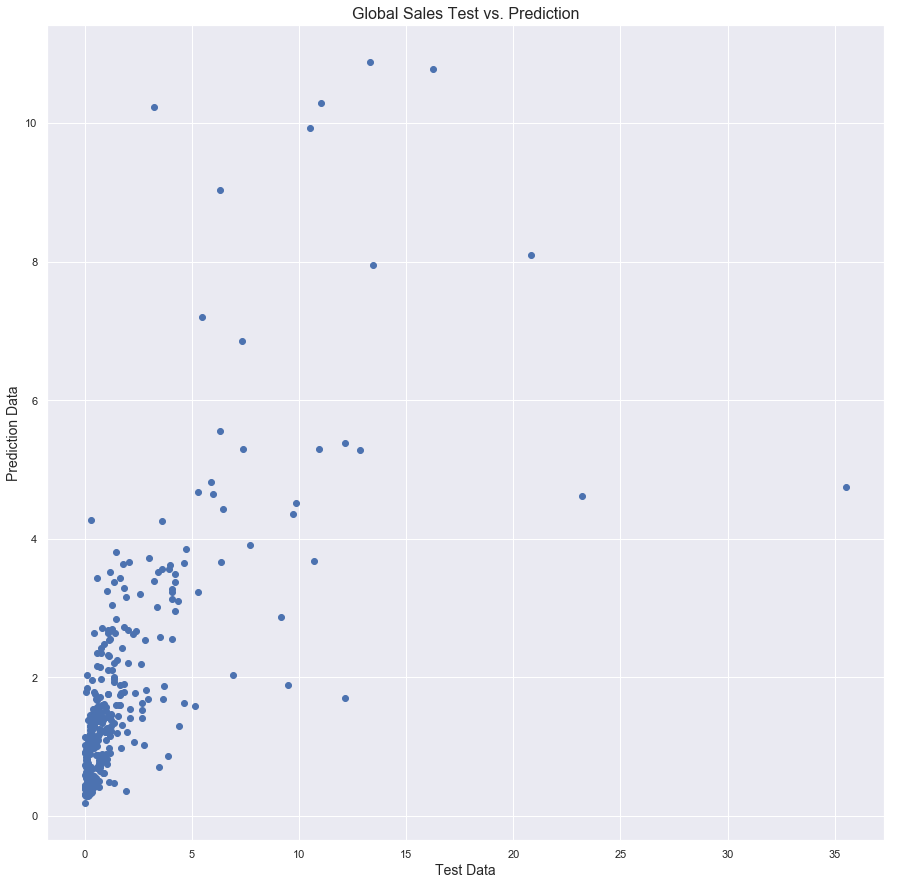

In [5]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(GS_y_test, GS_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Global Sales Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.43 and a Root Mean Squared Error around 2.72. When comparing the test and prediction data in a plot, there is a minimal slope further showing the weakness of the model.**

In [6]:
# Looking at most important features
GS_Features = pd.Series(GS_CV.best_estimator_.feature_importances_, index=GS_X.columns).sort_values(ascending=False)
GS_Features

Critic_Score                                                0.083531
mw                                                          0.074927
super                                                       0.072384
User_Count                                                  0.067672
PC                                                          0.055662
mario                                                       0.051665
Critic_Count                                                0.027872
hasnt                                                       0.022519
a                                                           0.017193
perk                                                        0.015752
car                                                         0.012758
drive                                                       0.012724
cod                                                         0.012298
grand                                                       0.011764
fanboy                            

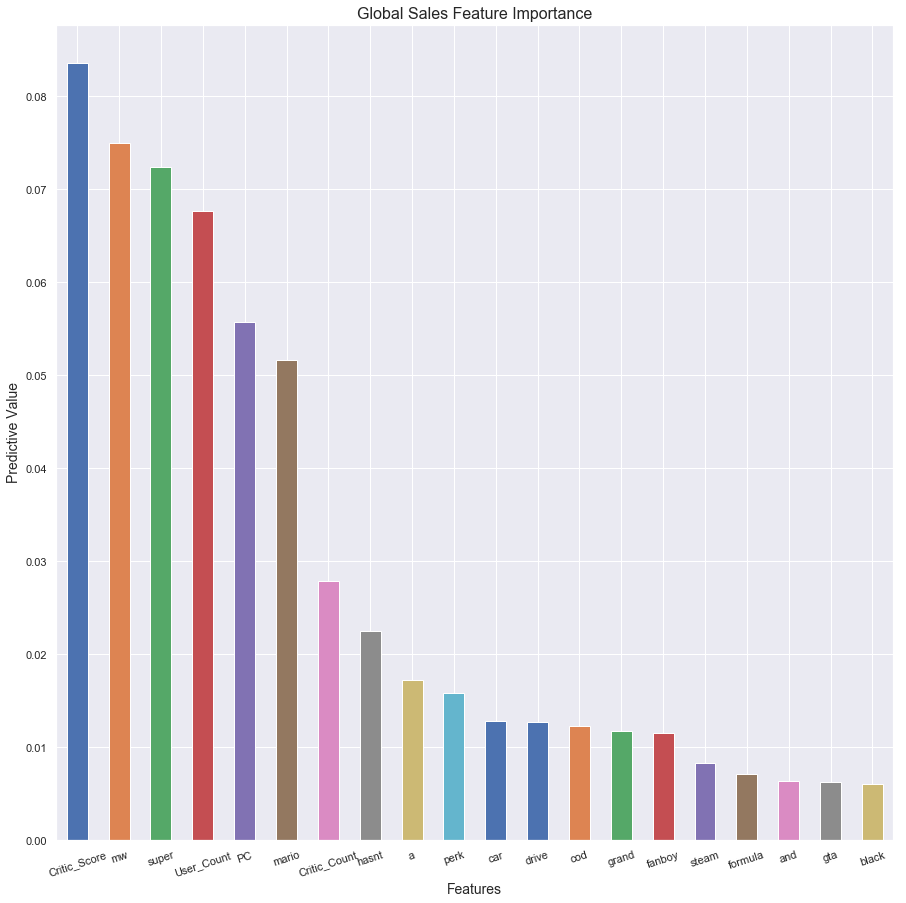

In [7]:
# Plotting Feature Importance
_ = GS_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=18)
_ = plt.xlabel('Features', fontsize=14)
_ = plt.ylabel('Predictive Value', fontsize=14)
_ = plt.title('Global Sales Feature Importance', fontsize=16)

** The most critical features for this model include Critic_Score, User_Count and Critic_Count as well as PC games plus the words "mw" (likely standing for "Modern Warfare"), "super" and "mario." The least important features tend to be different Developers and also certain consoles.**

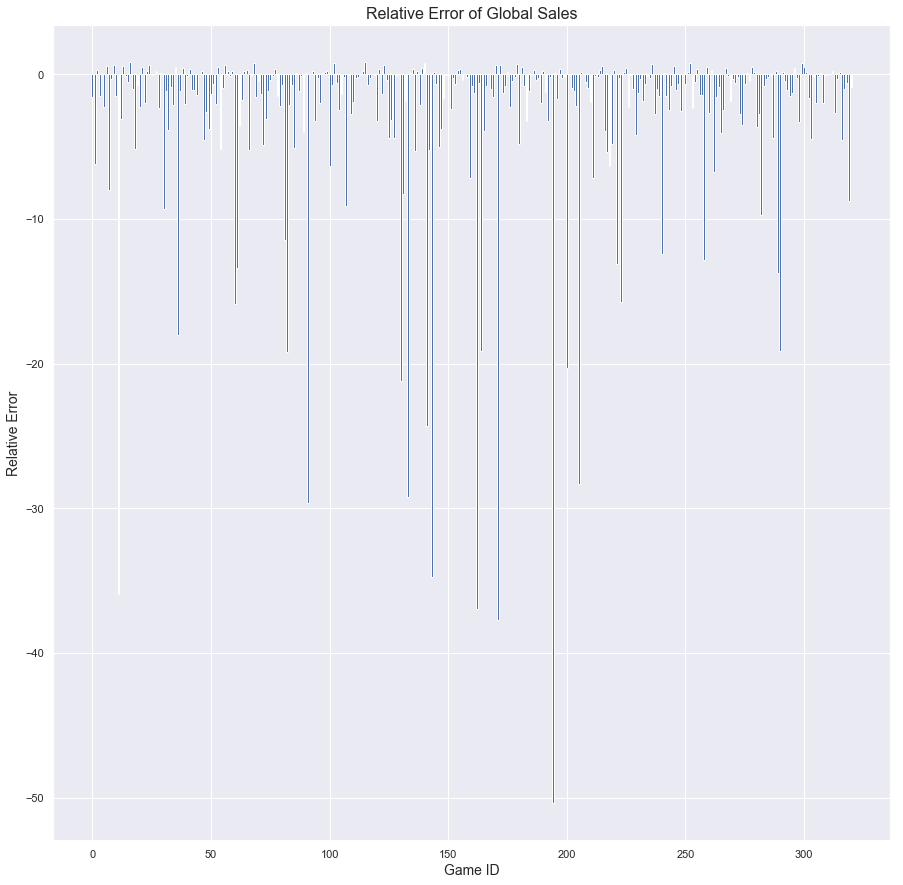

In [8]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(GS_y_test)), (GS_y_test - GS_y_pred)/GS_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of Global Sales', fontsize=16)

In [9]:
# Games with the highest difference
GS_dif = GS_y_test[(GS_y_test - GS_y_pred)/GS_y_test < -20]
GS_dif = df.loc[list(GS_dif.index.values), :]
GS_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
361,Enemy Territory: Quake Wars,PC,0.068780,0.000000,0.0,0.0,0.000000,0.009416,0.000000,0.024777,...,0,0,0,0,0,0,0,0,0,1
1394,The Talos Principle,PS4,0.060802,0.003021,0.0,0.0,0.030542,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
1018,Painkiller,PC,0.038861,0.003083,0.0,0.0,0.000000,0.004333,0.000000,0.021394,...,0,0,0,0,0,0,0,0,1,0
988,Neverwinter Nights,PC,0.072741,0.005766,0.0,0.0,0.000000,0.001137,0.000000,0.009531,...,0,0,0,0,0,0,0,0,0,1
757,Mafia,PC,0.054500,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.004386,...,0,0,0,0,0,0,0,0,1,0
185,Child of Light,PS4,0.110520,0.016427,0.0,0.0,0.001307,0.000000,0.000000,0.000696,...,0,0,0,0,0,0,0,1,0,0
1599,Zero Escape: Virtue's Last Reward,3DS,0.064891,0.004045,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1429,Tiger Woods PGA Tour 2005,PC,0.150584,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1543,Warhammer Online: Age of Reckoning,PC,0.067238,0.004384,0.0,0.0,0.000890,0.003050,0.000494,0.003364,...,0,0,0,0,0,0,0,0,0,1
1564,World in Conflict,PC,0.077053,0.012004,0.0,0.0,0.001957,0.003662,0.000847,0.032085,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Looking at the most important features for these games
GS_dif[['Name', 'Critic_Score', 'mw', 'super', 'User_Count', 'PC']]

,Name,Critic_Score,mw,super,User_Count,PC
361,Enemy Territory: Quake Wars,84.0,0.00000,0.002717,231.0,1
1394,The Talos Principle,88.0,0.00000,0.004296,124.0,0
1018,Painkiller,81.0,0.00000,0.007599,284.0,1
988,Neverwinter Nights,91.0,0.00000,0.000000,490.0,1
757,Mafia,88.0,0.00000,0.001020,863.0,1
185,Child of Light,82.0,0.00000,0.004451,451.0,0
1599,Zero Escape: Virtue's Last Reward,88.0,0.00000,0.000000,188.0,0
1429,Tiger Woods PGA Tour 2005,91.0,0.00000,0.000000,39.0,1
1543,Warhammer Online: Age of Reckoning,86.0,0.00000,0.001456,374.0,1
1564,World in Conflict,89.0,0.00747,0.000000,301.0,1


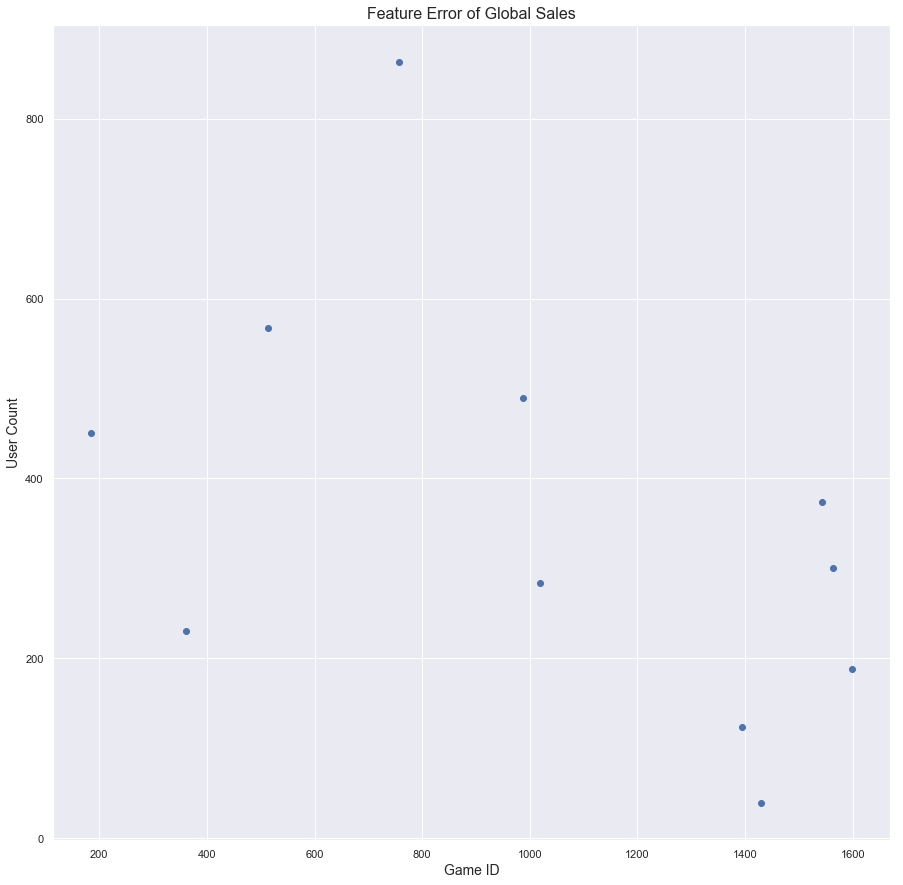

In [11]:
# Plotting the important features
_ = plt.scatter(x=GS_dif.index, y=GS_dif['User_Count'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('User Count', fontsize=14)
_ = plt.title('Feature Error of Global Sales', fontsize=16)

** When it comes to the biggest difference between test and prediction, the major features that stand out include PC, Critic_Score and User_Count. While not all of the games are PC games, a fair amount is and the Critic Scores are a little higher than the sweet spot (around 80%). However, User Count tends to be the most extreme with one being under 40 and another over 800. That might be the biggest reason for the games with the biggest difference between test and prediction.**

** Now to use same model when Global Sales is equal to or higher than the median.**

In [12]:
# Setting up Global Sales higher than or equal to the Median
GS_median = df['Global_Sales'].median()
GS_median = df[df['Global_Sales'] >= GS_median]

# Setting X and y for Global Sales
GS_MED_X = GS_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
GS_MED_y = GS_median['Global_Sales']

# Splitting the data into Train and Test
GS_MED_X_train, GS_MED_X_test, GS_MED_y_train, GS_MED_y_test = train_test_split(GS_MED_X, GS_MED_y, test_size=0.2, random_state=42)

In [13]:
# Using a Random Forest Regressor
GS_MED_PG = {'n_estimators': [10, 100]}

GS_MED_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
GS_MED_CV = GridSearchCV(GS_MED_RF, GS_MED_PG, cv=5)

GS_MED_CV.fit(GS_MED_X_train, GS_MED_y_train)

GS_MED_y_pred = GS_MED_CV.predict(GS_MED_X_test)

GS_MED_R2 = GS_MED_CV.score(GS_MED_X_test, GS_MED_y_test)
GS_MED_RMSE = np.sqrt(mean_squared_error(GS_MED_y_test, GS_MED_y_pred))

print('R^2: ' + str(GS_MED_R2))
print('Root Mean Squared Error: ' + str(GS_MED_RMSE))

R^2: 0.450507280728
Root Mean Squared Error: 2.85000486672


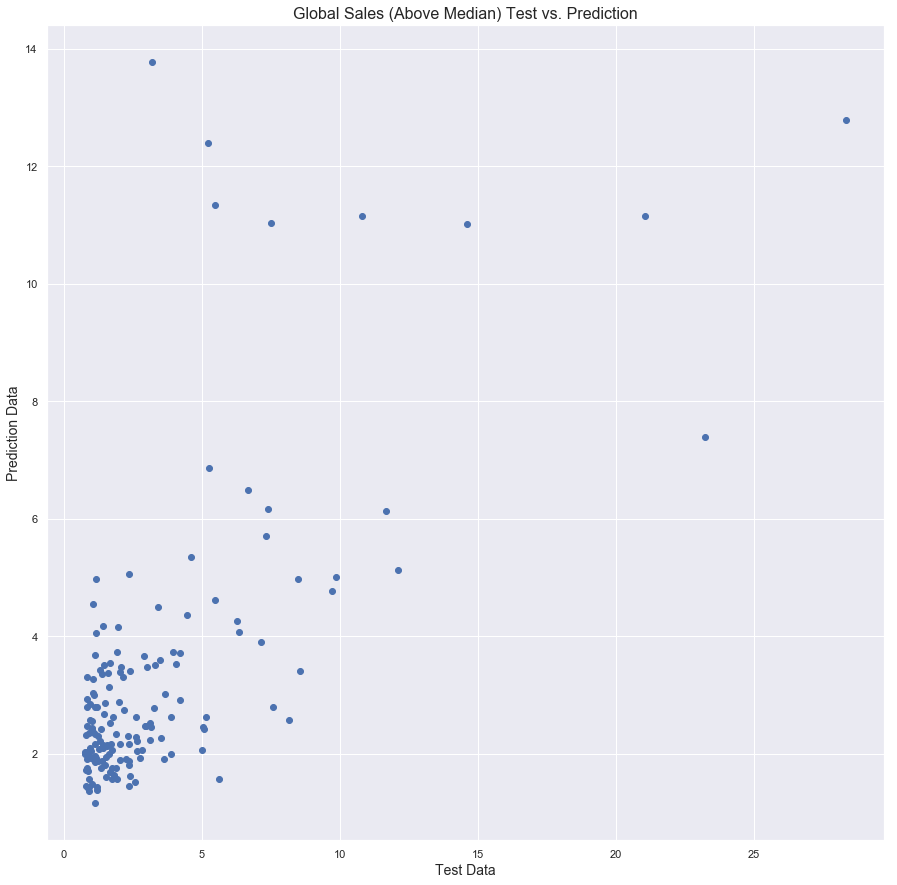

In [14]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(GS_MED_y_test, GS_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Global Sales (Above Median) Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.45 and a Root Mean Squared Error around 2.85. When comparing the test and prediction data in a plot, there is a minimal slope, which appears better than Global Sales overall along with a higher R^2. Plus, this model did better without the parameters, possibly because it is a small subset of the data.**

In [15]:
# Looking at most important features
GS_MED_Features = pd.Series(GS_MED_CV.best_estimator_.feature_importances_, index=GS_MED_X.columns).sort_values(ascending=False)
GS_MED_Features

User_Count                                        0.083473
Critic_Score                                      0.057110
super                                             0.054694
mario                                             0.049911
kart                                              0.043626
mw                                                0.038981
call                                              0.027484
car                                               0.022867
Developer_Rockstar North                          0.020686
Developer_Polyphony Digital                       0.019468
cod                                               0.017205
place                                             0.011953
grand                                             0.010617
gta                                               0.009613
modern                                            0.008789
realism                                           0.007690
feel                                              0.0076

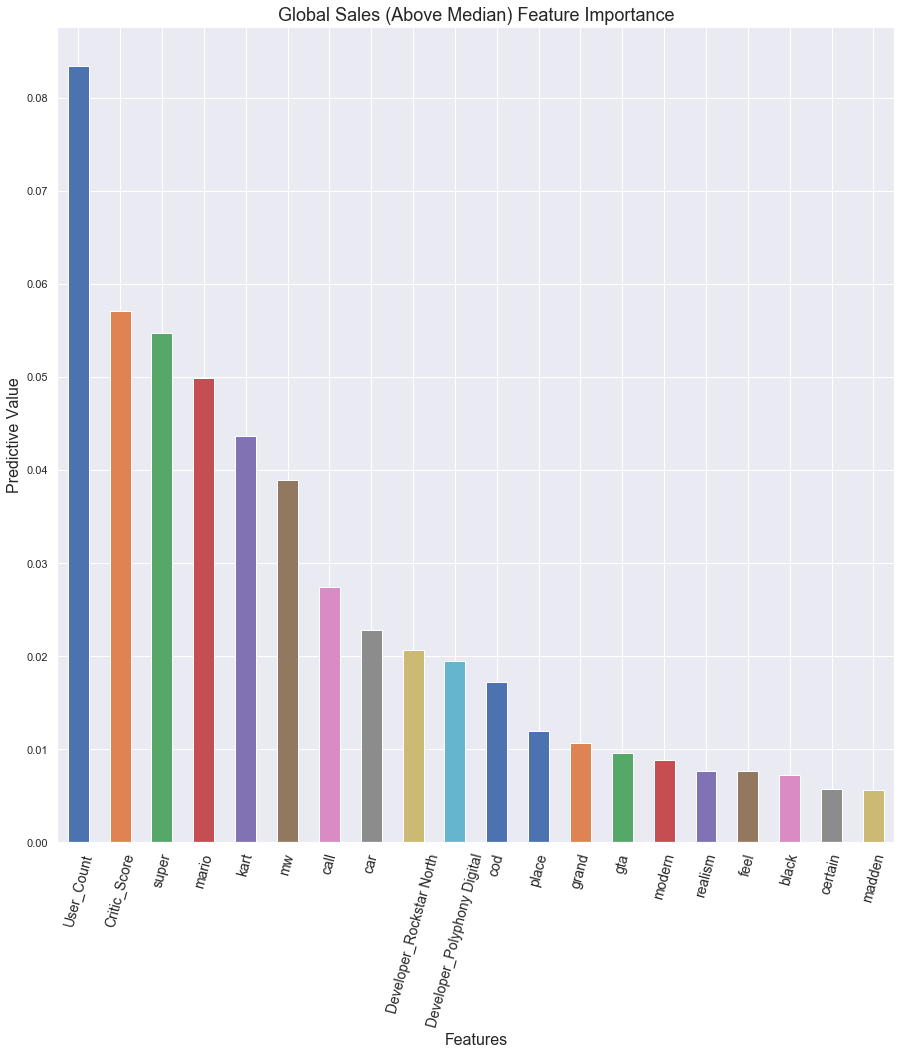

In [16]:
# Plotting Feature Importance
_ = GS_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('Global Sales (Above Median) Feature Importance', fontsize=18)

** The most critical features for this model include User_Count and Critic_Score as well as  the words "super," "mario" and "kart." Clearly "Mario" games including the "Mario Kart" series are important for this model. And while Developers tended to be the least important features, Rockstar North and Polyphony Digital do have significant impacts.**

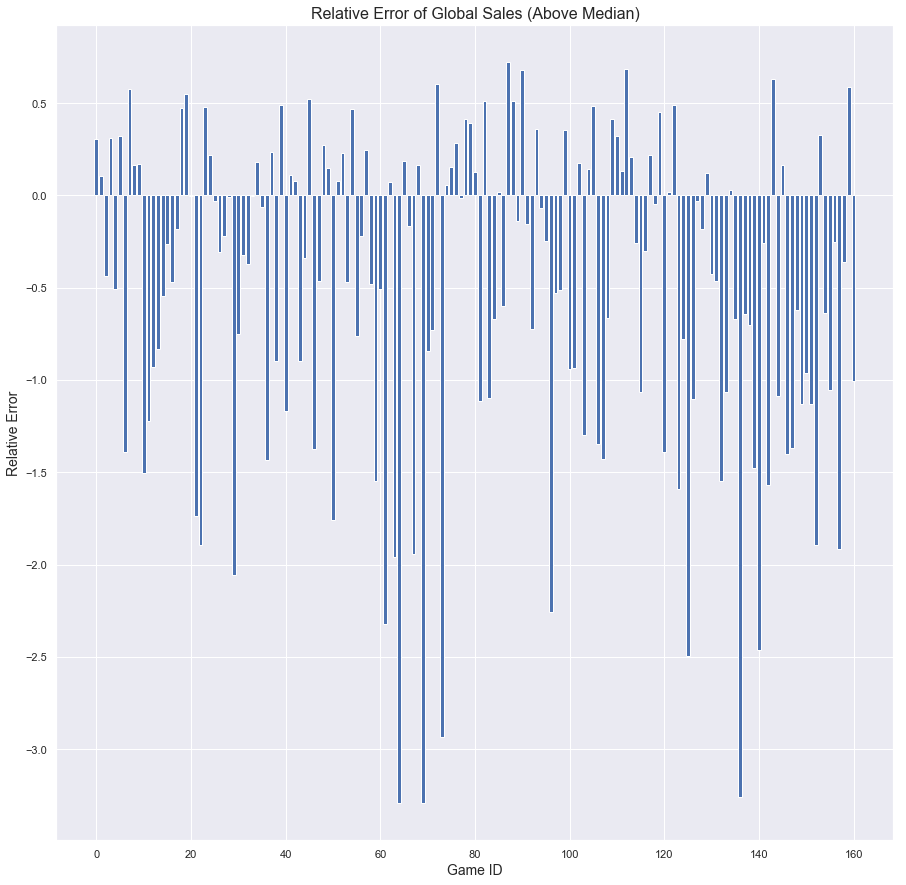

In [17]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(GS_MED_y_test)), (GS_MED_y_test - GS_MED_y_pred)/GS_MED_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of Global Sales (Above Median)', fontsize=16)

In [18]:
# Games with the highest difference
GS_MED_dif = GS_MED_y_test[(GS_MED_y_test - GS_MED_y_pred)/GS_MED_y_test < -2.0]
GS_MED_dif = df.loc[list(GS_MED_dif.index.values), :]
GS_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
148,Call of Duty 3,PS2,0.050115,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.012792,...,0,0,0,0,0,0,0,0,0,1
1152,Rogue Galaxy,PS2,0.069172,0.001984,0.0,0.0,0.000000,0.000000,0.000000,0.029271,...,0,0,0,0,0,0,0,0,0,1
1295,Super Mario Maker,WiiU,0.075648,0.001309,0.0,0.0,0.000000,0.008684,0.000000,0.000428,...,0,0,0,0,0,0,1,0,0,0
299,Diablo II: Lord of Destruction,PC,0.037064,0.008394,0.0,0.0,0.000729,0.000000,0.022179,0.004019,...,0,0,0,0,0,0,0,0,1,0
1590,Xenoblade Chronicles X,WiiU,0.081688,0.012303,0.0,0.0,0.000000,0.002024,0.000000,0.001621,...,0,0,0,0,0,0,0,0,0,1
1550,Watch Dogs 2,PS4,0.070993,0.005749,0.0,0.0,0.000000,0.002092,0.001681,0.003740,...,0,0,0,0,0,0,0,0,1,0
827,Metroid: Zero Mission,GBA,0.054416,0.005348,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
768,Mario vs. Donkey Kong,GBA,0.139643,0.005347,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1259,Spore,PC,0.072544,0.009067,0.0,0.0,0.002551,0.001524,0.000156,0.003058,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Looking at the most important features for these games
GS_MED_dif[['Name', 'User_Count', 'Critic_Score', 'super', 'mario']]

,Name,User_Count,Critic_Score,super,mario
148,Call of Duty 3,83.0,82.0,0.000000,0.000000
1152,Rogue Galaxy,89.0,83.0,0.002306,0.000000
1295,Super Mario Maker,691.0,88.0,0.128550,0.330630
299,Diablo II: Lord of Destruction,639.0,87.0,0.000000,0.000000
1590,Xenoblade Chronicles X,1548.0,84.0,0.003376,0.002821
1550,Watch Dogs 2,621.0,83.0,0.005125,0.001239
827,Metroid: Zero Mission,132.0,89.0,0.063072,0.005208
768,Mario vs. Donkey Kong,31.0,81.0,0.018643,0.313445
1259,Spore,1711.0,84.0,0.001692,0.000602


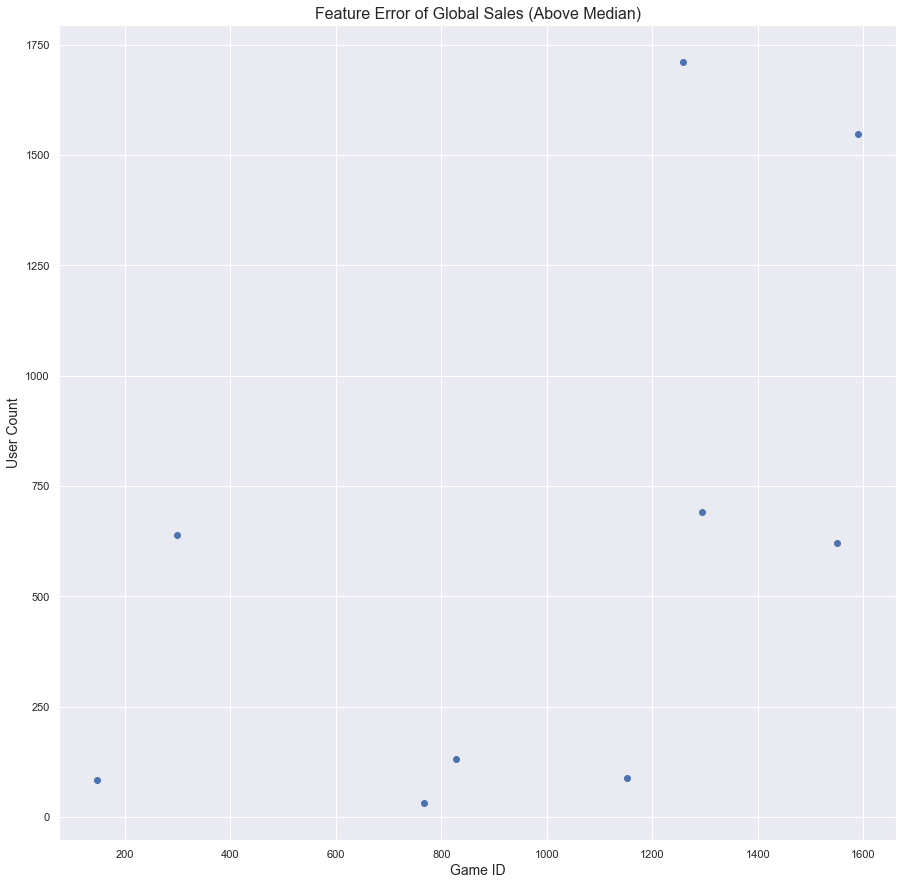

In [20]:
# Plotting the important features
_ = plt.scatter(x=GS_MED_dif.index, y=GS_MED_dif['User_Count'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('User Count', fontsize=14)
_ = plt.title('Feature Error of Global Sales (Above Median)', fontsize=16)

** When it comes to the biggest difference between test and prediction, User_Count seems to have strongest impact. Some are in the double digits while another is over one thousand. These extreme values are likely causing issues with the model.**

** Now to use the same model on North American Sales.**

In [21]:
# Setting X and y for North American Sales
NA_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
NA_y = df['NA_Sales']

# Splitting the data into Train and Test
NA_X_train, NA_X_test, NA_y_train, NA_y_test = train_test_split(NA_X, NA_y, test_size=0.2, random_state=42)

In [22]:
# Using a Random Forest Regressor
NA_PG = {'n_estimators': [10, 100]}

NA_RF = RandomForestRegressor(min_samples_leaf=3, max_leaf_nodes=1000, random_state=42)

# Using GridSearchCV to help avoid overfitting
NA_CV = GridSearchCV(NA_RF, NA_PG, cv=5)

NA_CV.fit(NA_X_train, NA_y_train)

NA_y_pred = NA_CV.predict(NA_X_test)

NA_R2 = NA_CV.score(NA_X_test, NA_y_test)
NA_RMSE = np.sqrt(mean_squared_error(NA_y_test, NA_y_pred))

print('R^2: ' + str(NA_R2))
print('Root Mean Squared Error: ' + str(NA_RMSE))

R^2: 0.427934081067
Root Mean Squared Error: 1.32674922366


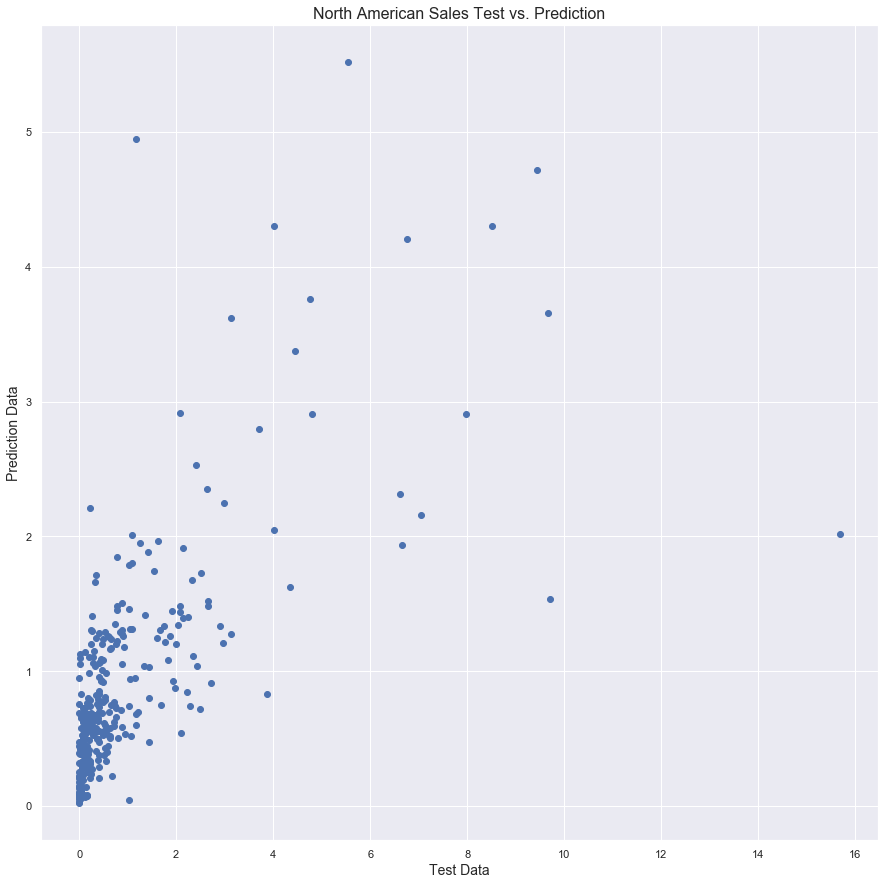

In [23]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(NA_y_test, NA_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('North American Sales Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.43 and a Root Mean Squared Error around 1.33. When comparing the test and prediction data in a plot, there is a minimal slope further showing the weakness of the model. This is very similar to Global Sales both in the slope as well as R^2. This model used the same parameters and received a lower RMSE.**

In [24]:
# Looking at most important features
NA_Features = pd.Series(NA_CV.best_estimator_.feature_importances_, index=NA_X.columns).sort_values(ascending=False)
NA_Features

Critic_Score                                   0.135790
mw                                             0.088687
super                                          0.059043
mario                                          0.051129
Critic_Count                                   0.051008
User_Count                                     0.040096
modern                                         0.031450
PC                                             0.030632
madden                                         0.028776
black                                          0.019736
suck                                           0.019503
a                                              0.007115
star                                           0.006470
coop                                           0.006280
perk                                           0.005333
cod                                            0.005291
u                                              0.004869
realism                                        0

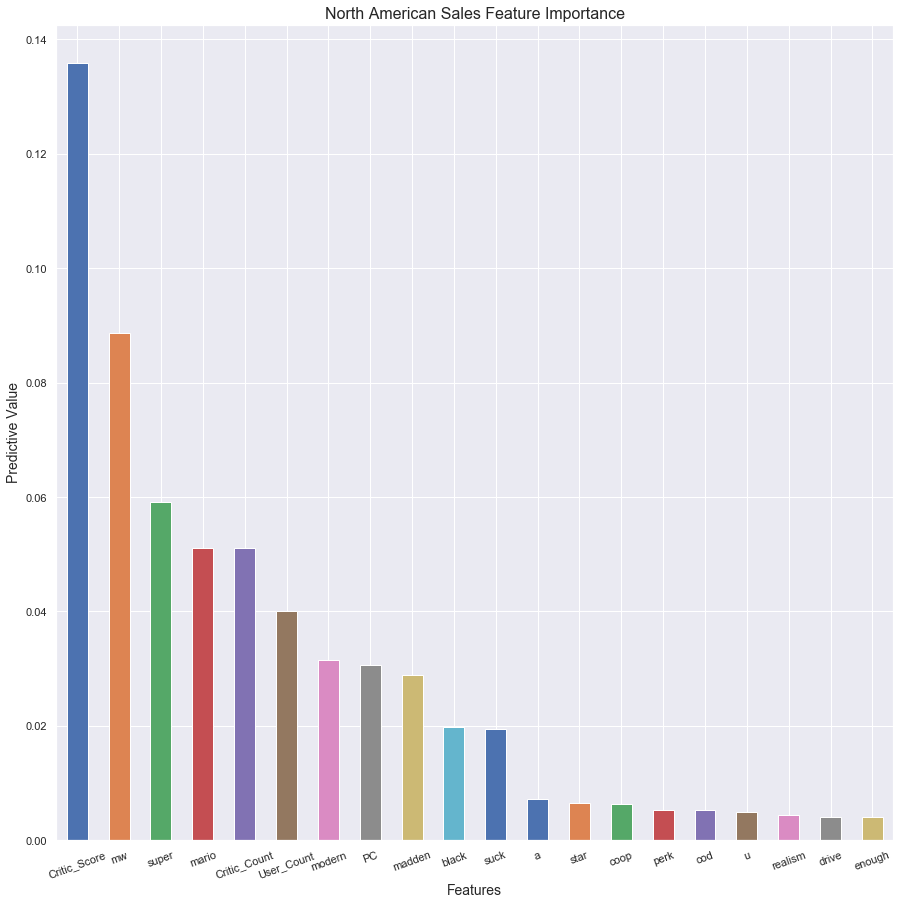

In [25]:
# Plotting Feature Importance
_ = NA_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=20)
_ = plt.xlabel('Features', fontsize=14)
_ = plt.ylabel('Predictive Value', fontsize=14)
_ = plt.title('North American Sales Feature Importance', fontsize=16)

** The most critical features for this model are also similar to Global Sales including Critic_Score, User_Count and Critic_Count as well as PC games plus the words "mw," "super" and "mario." The least important features tend to be different Developers. One more noticeable difference is how important the word "madden" is, which shows how popular the "Madden" NFL games are in North America.**

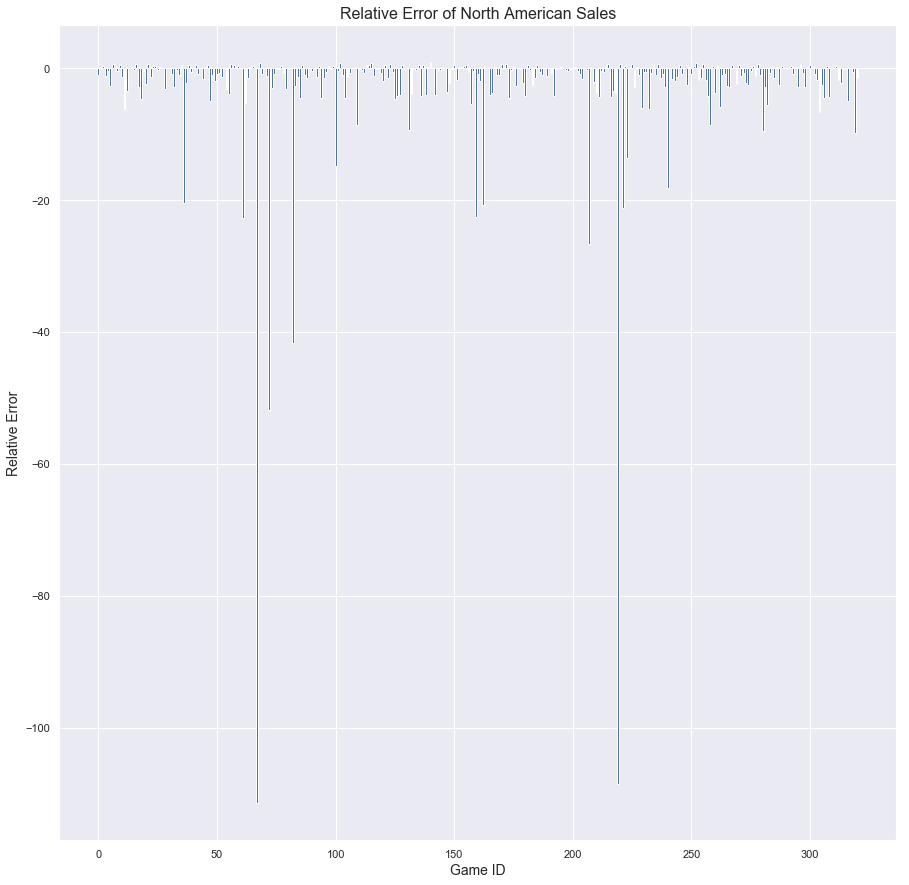

In [26]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(NA_y_test)), (NA_y_test - NA_y_pred)/NA_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of North American Sales', fontsize=16)

In [27]:
# Games with the highest difference
NA_dif = NA_y_test[(NA_y_test - NA_y_pred)/NA_y_test < -100]
NA_dif = df.loc[list(NA_dif.index.values), :]
NA_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.0,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.0,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
1573,Worldwide Soccer Manager 2008,PC,0.054256,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
70,Battlefield 2,PC,0.057133,0.005604,0.0,0.0,0.003359,0.003186,0.001461,0.008601,...,0,0,0,0,0,0,0,0,0,1
23,Alien: Isolation,PC,0.083298,0.006913,0.0,0.0,0.000355,0.002881,0.001831,0.004107,...,0,0,0,0,0,0,0,0,1,0
1235,Sonic Adventure 2,DC,0.062907,0.004904,0.0,0.0,0.000000,0.000707,0.000772,0.012360,...,0,0,0,0,0,0,1,0,0,0
1395,The Typing of the Dead,DC,0.086325,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
297,Diablo,PC,0.068065,0.003841,0.0,0.0,0.002192,0.000000,0.000000,0.014209,...,0,0,0,0,0,0,0,0,1,0
986,Need for Speed: Shift,PC,0.082021,0.001783,0.0,0.0,0.002275,0.005711,0.001104,0.000379,...,0,0,0,0,0,0,1,0,0,0
560,Grandia II,DC,0.049215,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.015216,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# Looking at the most important features for these games
NA_dif[['Name', 'Critic_Score','mw', 'super', 'mario', 'Critic_Count', 'User_Count']]

,Name,Critic_Score,mw,super,mario,Critic_Count,User_Count
1140,Rise of the Tomb Raider,86.0,0.000000,0.008744,0.000000,45.0,915.0
239,Dark Souls III,89.0,0.000000,0.003179,0.001121,56.0,1848.0
1573,Worldwide Soccer Manager 2008,86.0,0.000000,0.000000,0.000000,15.0,19.0
70,Battlefield 2,91.0,0.002374,0.001144,0.000000,55.0,837.0
23,Alien: Isolation,81.0,0.000000,0.001282,0.000000,41.0,1588.0
1235,Sonic Adventure 2,89.0,0.000000,0.000000,0.005550,18.0,236.0
1395,The Typing of the Dead,83.0,0.000000,0.000000,0.000000,12.0,12.0
297,Diablo,94.0,0.000000,0.000000,0.000000,12.0,850.0
986,Need for Speed: Shift,83.0,0.003831,0.003276,0.000000,22.0,387.0
560,Grandia II,90.0,0.000000,0.000000,0.000000,17.0,57.0


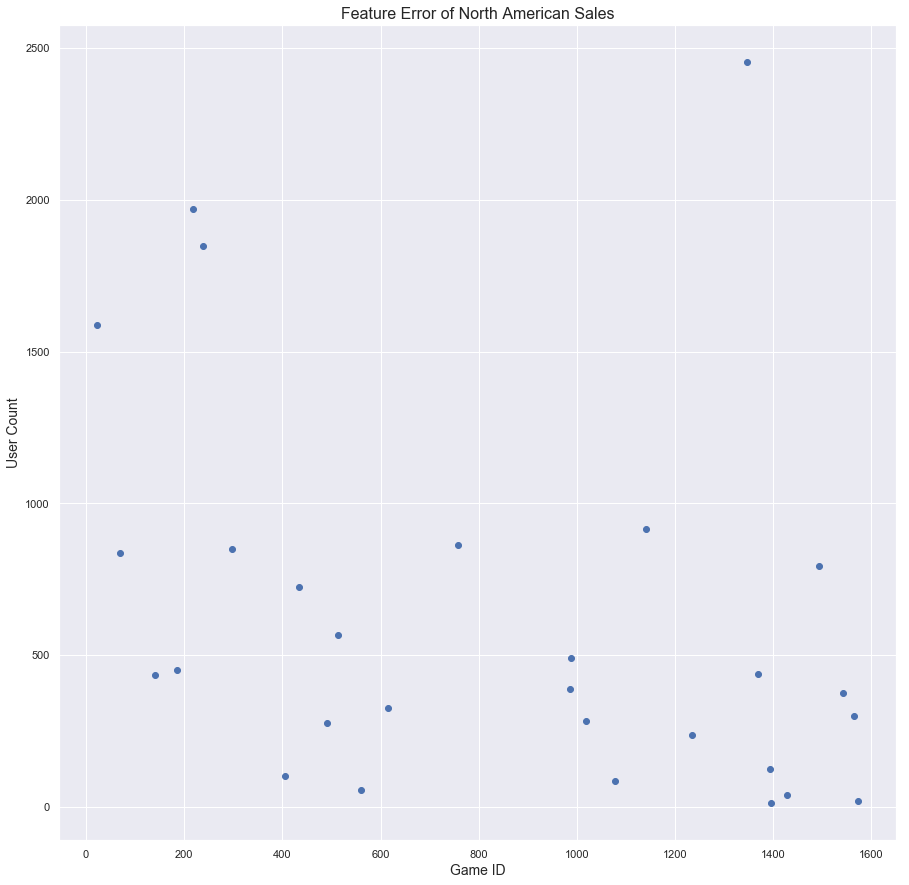

In [29]:
# Plotting the important features
_ = plt.scatter(x=NA_dif.index, y=NA_dif['User_Count'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('User Count', fontsize=14)
_ = plt.title('Feature Error of North American Sales', fontsize=16)

** User_Count once again tends to have the biggest impact on the more extreme differences between test and prediction. Some games have counts in the double digits while others are over one thousand.**

** Now to use same model when North American Sales is equal to or higher than the median.**

In [30]:
# Setting up North American Sales higher than or equal to the Median
NA_median = df['NA_Sales'].median()
NA_median = df[df['NA_Sales'] >= NA_median]

# Setting X and y for North American Sales
NA_MED_X = NA_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
NA_MED_y = NA_median['NA_Sales']

# Splitting the data into Train and Test
NA_MED_X_train, NA_MED_X_test, NA_MED_y_train, NA_MED_y_test = train_test_split(NA_MED_X, NA_MED_y, test_size=0.2, random_state=42)

In [31]:
# Using a Random Forest Regressor
NA_MED_PG = {'n_estimators': [10, 100]}

NA_MED_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
NA_MED_CV = GridSearchCV(NA_MED_RF, NA_MED_PG, cv=5)

NA_MED_CV.fit(NA_MED_X_train, NA_MED_y_train)

NA_MED_y_pred = NA_MED_CV.predict(NA_MED_X_test)

NA_MED_R2 = NA_MED_CV.score(NA_MED_X_test, NA_MED_y_test)
NA_MED_RMSE = np.sqrt(mean_squared_error(NA_MED_y_test, NA_MED_y_pred))

print('R^2: ' + str(NA_MED_R2))
print('Root Mean Squared Error: ' + str(NA_MED_RMSE))

R^2: 0.157412703899
Root Mean Squared Error: 1.51211992304


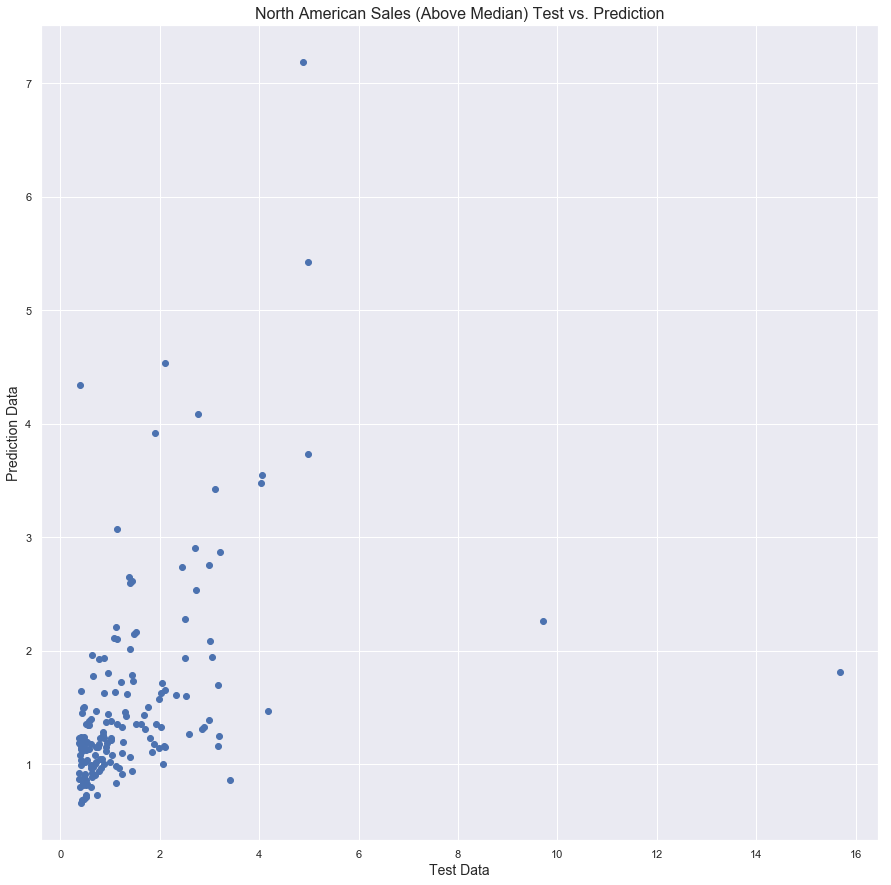

In [32]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(NA_MED_y_test, NA_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('North American Sales (Above Median) Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.16 and a Root Mean Squared Error around 1.51. When comparing the test and prediction data in a plot, there is a minimal slope. This model is far weaker than North American sales overall with R^2 being significantly lower along with a higher RMSE. Although this did better without parameters, splitting North American sales by the median may lead to a significantly smaller subset that is much harder to predict on.**

In [33]:
# Looking at most important features
NA_MED_Features = pd.Series(NA_MED_CV.best_estimator_.feature_importances_, index=NA_MED_X.columns).sort_values(ascending=False)
NA_MED_Features

User_Count                                                  0.107717
Critic_Score                                                0.084239
mario                                                       0.067109
super                                                       0.056008
mw                                                          0.033565
call                                                        0.028752
halo                                                        0.026967
san                                                         0.018984
campaign                                                    0.018472
modern                                                      0.018153
Developer_Rockstar North                                    0.016894
one                                                         0.014744
madden                                                      0.011450
recommend                                                   0.009354
Developer_Polyphony Digital       

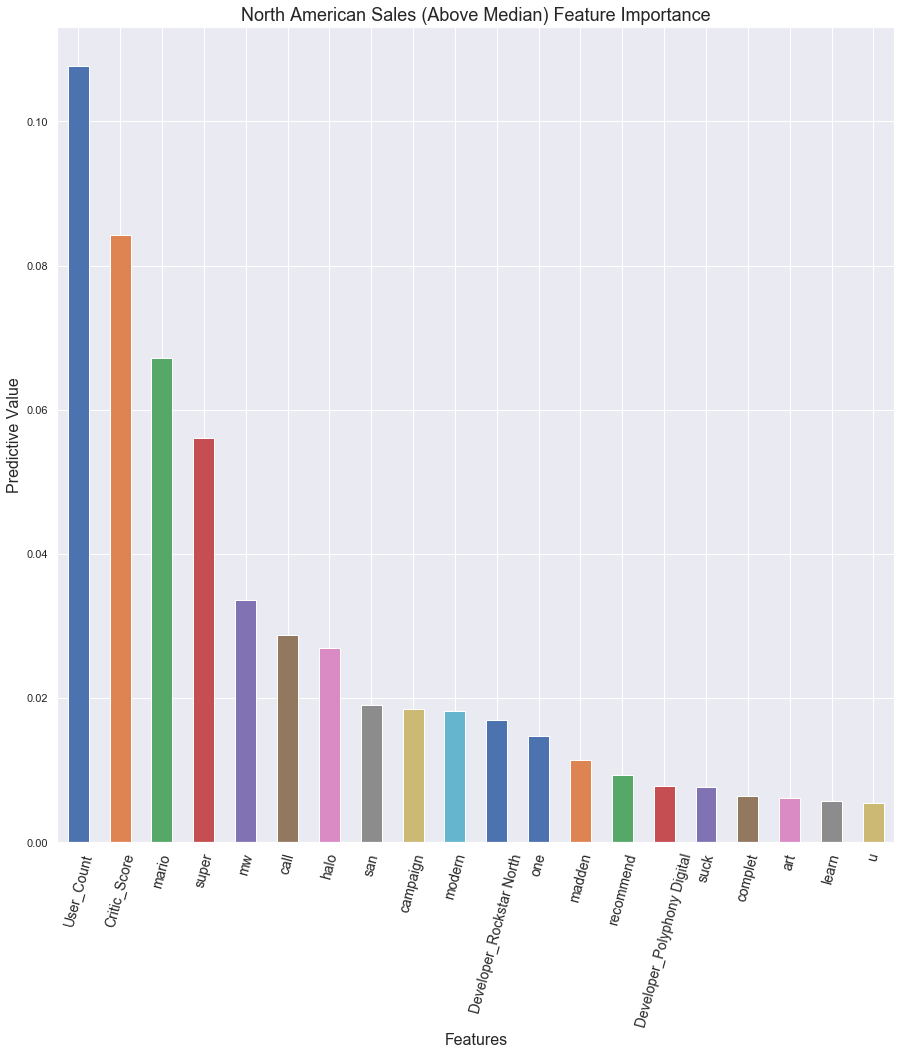

In [34]:
# Plotting Feature Importance
_ = NA_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('North American Sales (Above Median) Feature Importance', fontsize=18)

** The most critical features for this model include User_Count and Critic_Score as well as the words "mario," "super" and "mw." The least important features tend to be different Developers and also Publishers. This spectrum is very similar to the model for overall North American sales except for certain words being higher like "halo."**

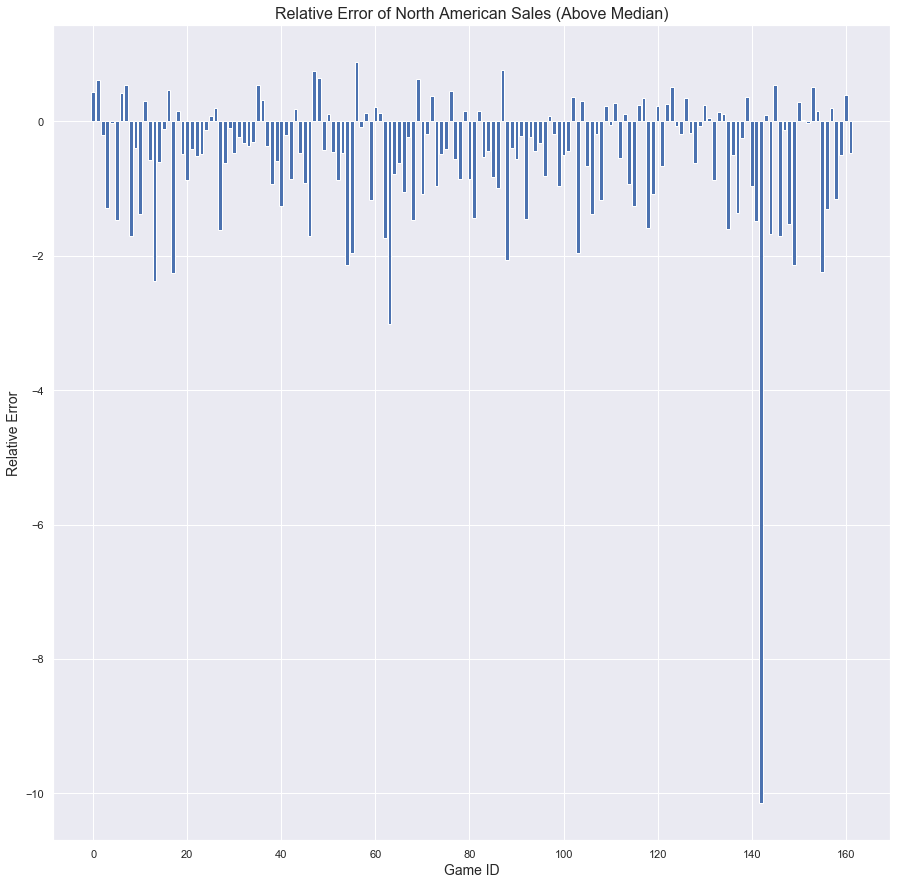

In [35]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(NA_MED_y_test)), (NA_MED_y_test - NA_MED_y_pred)/NA_MED_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of North American Sales (Above Median)', fontsize=16)

In [36]:
# Games with the highest difference
NA_MED_dif = NA_MED_y_test[(NA_MED_y_test - NA_MED_y_pred)/NA_MED_y_test < -2]
NA_MED_dif = df.loc[list(NA_MED_dif.index.values), :]
NA_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
1589,Xenoblade Chronicles,Wii,0.082440,0.006975,0.0,0.0,0.000000,0.004223,0.000401,0.004665,...,0,0,0,0,0,0,0,0,0,1
220,Crysis 2,PS3,0.071303,0.010309,0.0,0.0,0.000000,0.005927,0.002678,0.014718,...,0,0,0,0,0,0,0,0,1,0
1525,Viewtiful Joe,GC,0.047669,0.009399,0.0,0.0,0.000000,0.000000,0.000000,0.028073,...,0,0,0,0,0,0,0,0,0,1
367,F-Zero GX,GC,0.056847,0.005915,0.0,0.0,0.000000,0.000000,0.000000,0.001445,...,0,0,0,0,0,0,0,0,0,1
1131,Resistance 3,PS3,0.097324,0.011364,0.0,0.0,0.000000,0.000000,0.000346,0.014304,...,0,0,0,0,0,0,0,0,1,0
545,Grand Theft Auto V,PC,0.061818,0.005873,0.0,0.0,0.002268,0.000934,0.000623,0.005433,...,0,0,0,0,0,0,0,0,1,0
650,Kid Icarus: Uprising,3DS,0.095826,0.006146,0.0,0.0,0.001359,0.001775,0.003065,0.012796,...,0,0,0,0,0,0,0,1,0,0
1114,Rayman Origins,X360,0.110385,0.009780,0.0,0.0,0.000000,0.000000,0.000000,0.007807,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Looking at the most important features for these games
NA_MED_dif[['Name', 'User_Count', 'Critic_Score', 'mario', 'super', 'mw']]

,Name,User_Count,Critic_Score,mario,super,mw
1589,Xenoblade Chronicles,950.0,92.0,0.002890,0.007269,0.00000
220,Crysis 2,406.0,85.0,0.000000,0.002865,0.00308
1525,Viewtiful Joe,115.0,93.0,0.015656,0.001925,0.00000
367,F-Zero GX,161.0,89.0,0.007270,0.007050,0.00000
1131,Resistance 3,543.0,83.0,0.000000,0.000414,0.00150
545,Grand Theft Auto V,3756.0,96.0,0.000405,0.003186,0.00000
650,Kid Icarus: Uprising,487.0,83.0,0.017792,0.025980,0.00000
1114,Rayman Origins,209.0,87.0,0.044179,0.025075,0.00000


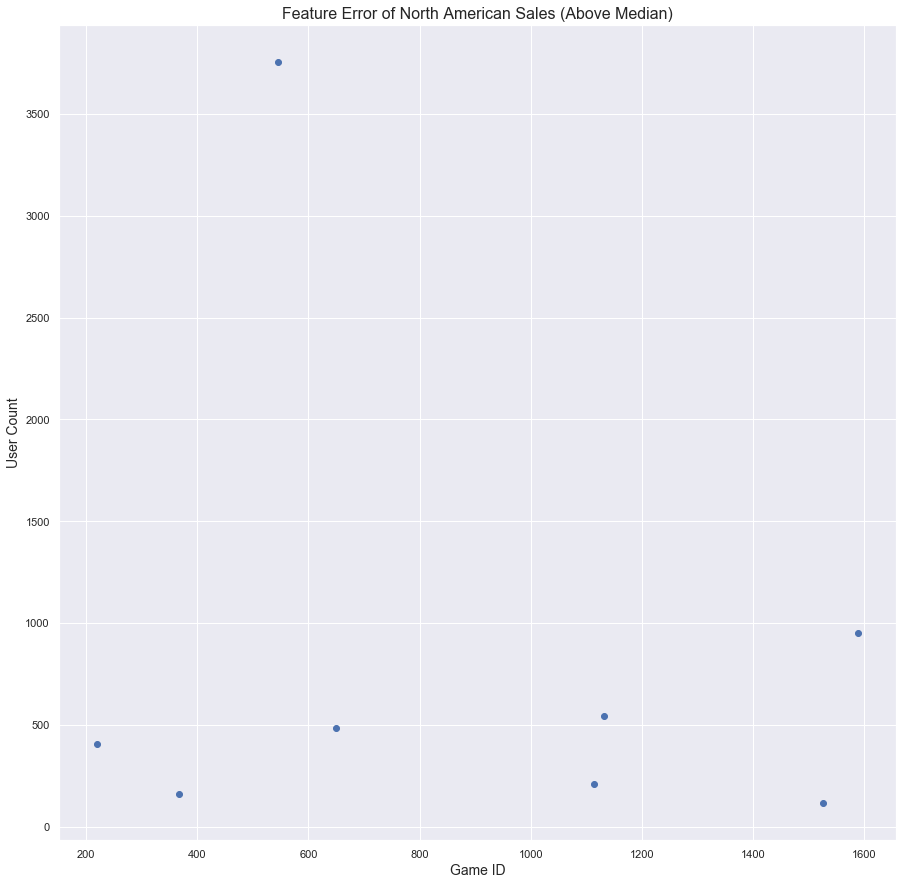

In [38]:
# Plotting the important features
_ = plt.scatter(x=NA_MED_dif.index, y=NA_MED_dif['User_Count'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('User Count', fontsize=14)
_ = plt.title('Feature Error of North American Sales (Above Median)', fontsize=16)

** Much like the previous models, User_Count explains the biggest differences between test and prediction especially "Grand Theft Auto V," which had over 3,000.**

** Now to use the same model on European Sales.**

In [39]:
# Setting X and y for European Sales
EU_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
EU_y = df['EU_Sales']

# Splitting the data into Train and Test
EU_X_train, EU_X_test, EU_y_train, EU_y_test = train_test_split(EU_X, EU_y, test_size=0.2, random_state=42)

In [40]:
# Using a Random Forest Regressor
EU_PG = {'n_estimators': [10, 100]}

EU_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
EU_CV = GridSearchCV(EU_RF, EU_PG, cv=5)

EU_CV.fit(EU_X_train, EU_y_train)

EU_y_pred = EU_CV.predict(EU_X_test)

EU_R2 = EU_CV.score(EU_X_test, EU_y_test)
EU_RMSE = np.sqrt(mean_squared_error(EU_y_test, EU_y_pred))

print('R^2: ' + str(EU_R2))
print('Root Mean Squared Error: ' + str(EU_RMSE))

R^2: 0.378277852356
Root Mean Squared Error: 0.930933818247


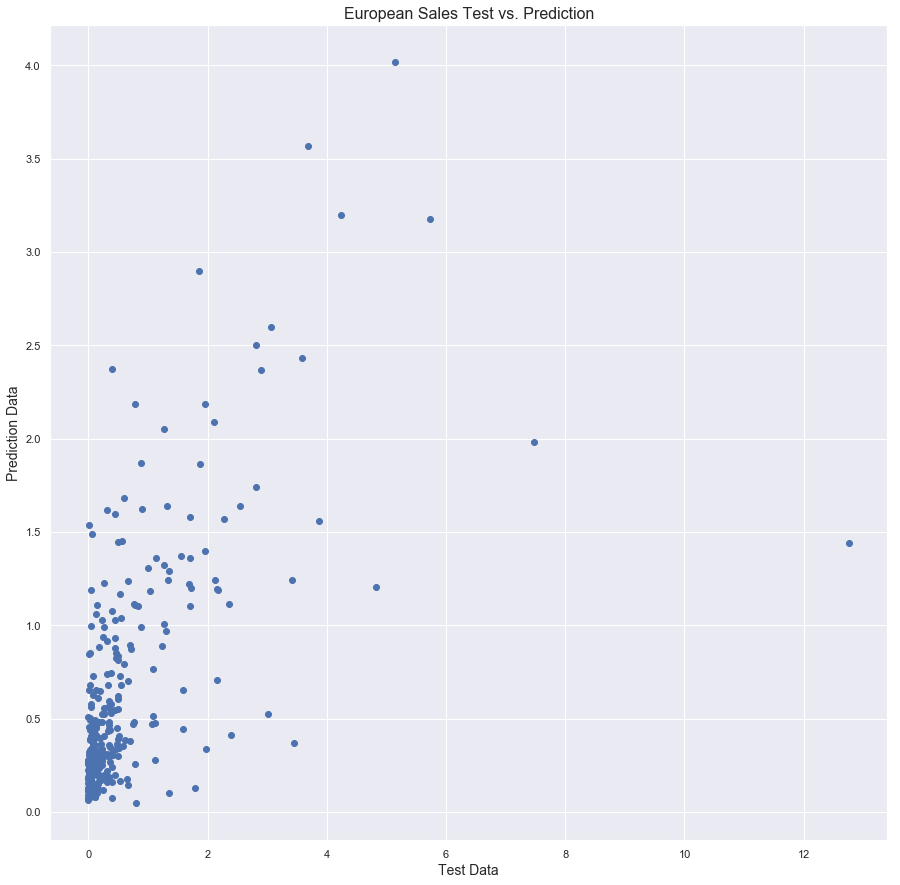

In [41]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(EU_y_test, EU_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('European Sales Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.38 and a Root Mean Squared Error around 0.93. When comparing the test and prediction data in a plot, there is a minimal slope further showing the weakness of the model. While the slope is similar to that of Global and North American sales, R^2 and the RMSE are lower. Also, this model did better without the extra parameters possibly because of the size of this subset.**

In [42]:
# Looking at most important features
EU_Features = pd.Series(EU_CV.best_estimator_.feature_importances_, index=EU_X.columns).sort_values(ascending=False)
EU_Features

User_Count                                       0.141604
fifa                                             0.053745
PC                                               0.034444
engin                                            0.029905
mw                                               0.024960
super                                            0.024936
gta                                              0.021803
Critic_Score                                     0.019469
perk                                             0.018484
steam                                            0.014670
mess                                             0.014015
mario                                            0.012177
ea                                               0.011743
mode                                             0.011683
opinion                                          0.009950
storylin                                         0.008456
money                                            0.008078
pay           

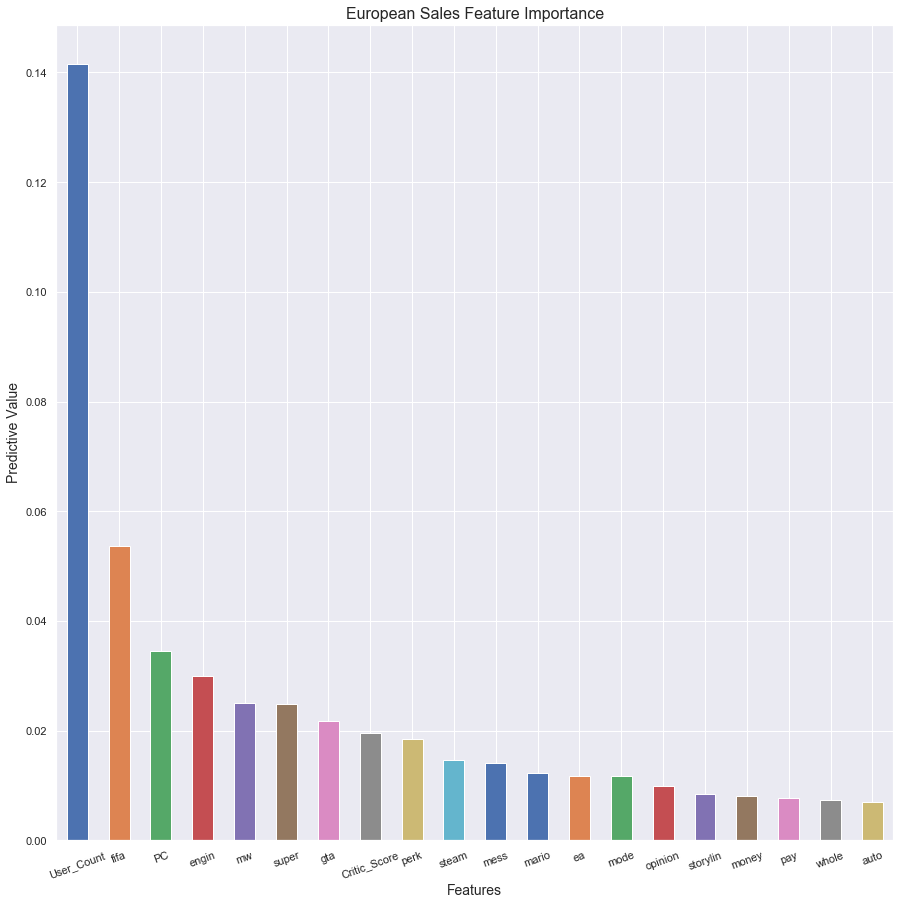

In [43]:
# Plotting Feature Importance
_ = EU_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=20)
_ = plt.xlabel('Features', fontsize=14)
_ = plt.ylabel('Predictive Value', fontsize=14)
_ = plt.title('European Sales Feature Importance', fontsize=16)

** The most critical features for this model include User_Count and Critic_Score as well as PC games plus the words "fifa," "engin" and "mw." The least important features tend to, once again, be different Developers and Publishers. While similar to previous models, this one places a greater impact on "FIFA" games, which makes sense because of how big soccer is in Europe.**

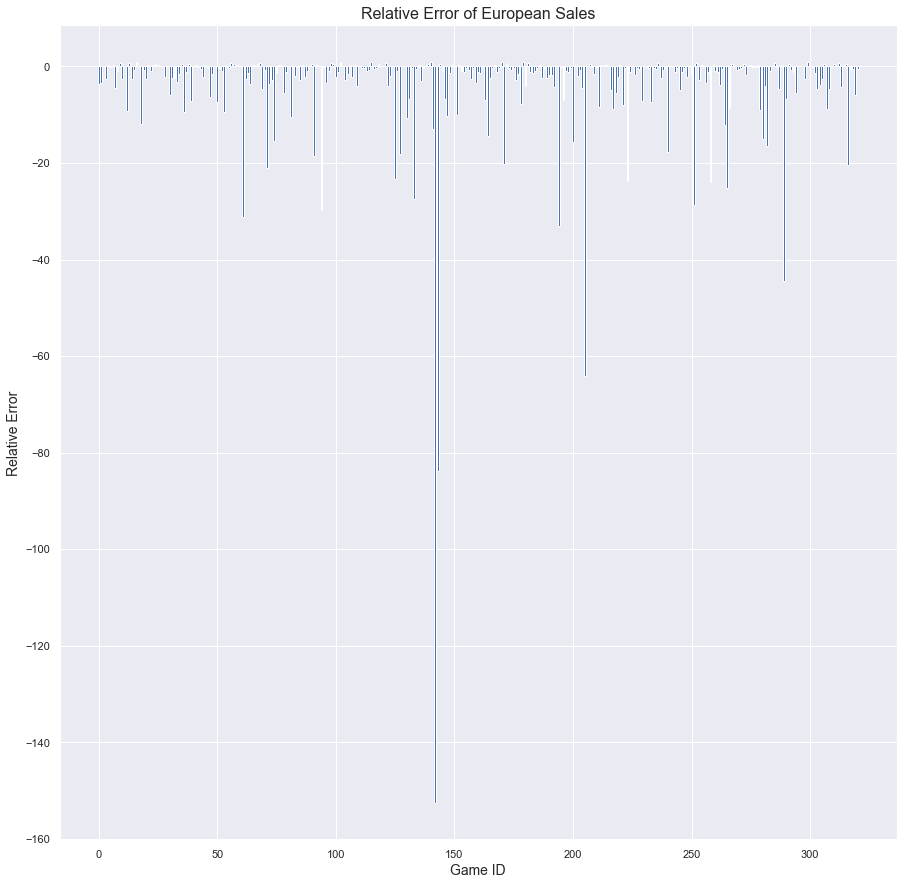

In [44]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(EU_y_test)), (EU_y_test - EU_y_pred)/EU_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of European Sales', fontsize=16)

In [45]:
# Games with the highest difference
EU_dif = EU_y_test[(EU_y_test - EU_y_pred)/EU_y_test < -140]
EU_dif = df.loc[list(EU_dif.index.values), :]
EU_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
361,Enemy Territory: Quake Wars,PC,0.068780,0.000000,0.0,0.0,0.000000,0.009416,0.000000,0.024777,...,0,0,0,0,0,0,0,0,0,1
1052,Plants vs. Zombies,X360,0.058245,0.003525,0.0,0.0,0.000000,0.006812,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
1096,Race Driver 2006,PSP,0.144451,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
1235,Sonic Adventure 2,DC,0.062907,0.004904,0.0,0.0,0.000000,0.000707,0.000772,0.012360,...,0,0,0,0,0,0,1,0,0,0
1395,The Typing of the Dead,DC,0.086325,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
704,MLB 09: The Show,PS3,0.060420,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1191,Shantae and the Pirate's Curse,3DS,0.081544,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
560,Grandia II,DC,0.049215,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.015216,...,0,0,0,0,0,0,0,0,0,1
706,MLB 11: The Show,PS3,0.079945,0.008061,0.0,0.0,0.013949,0.000000,0.000000,0.008789,...,0,0,0,0,0,0,1,0,0,0
712,MLB Power Pros,Wii,0.087956,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [46]:
# Looking at the most important features for these games
EU_dif[['Name', 'User_Count', 'fifa', 'PC', 'engin']]

,Name,User_Count,fifa,PC,engin
361,Enemy Territory: Quake Wars,231.0,0.000000,1,0.0
1052,Plants vs. Zombies,160.0,0.000000,0,0.0
1096,Race Driver 2006,6.0,0.000000,0,0.0
1235,Sonic Adventure 2,236.0,0.000000,0,0.0
1395,The Typing of the Dead,12.0,0.000000,0,0.0
704,MLB 09: The Show,61.0,0.000000,0,0.0
1191,Shantae and the Pirate's Curse,86.0,0.000000,0,0.0
560,Grandia II,57.0,0.000000,0,0.0
706,MLB 11: The Show,87.0,0.000000,0,0.0
712,MLB Power Pros,45.0,0.000000,0,0.0


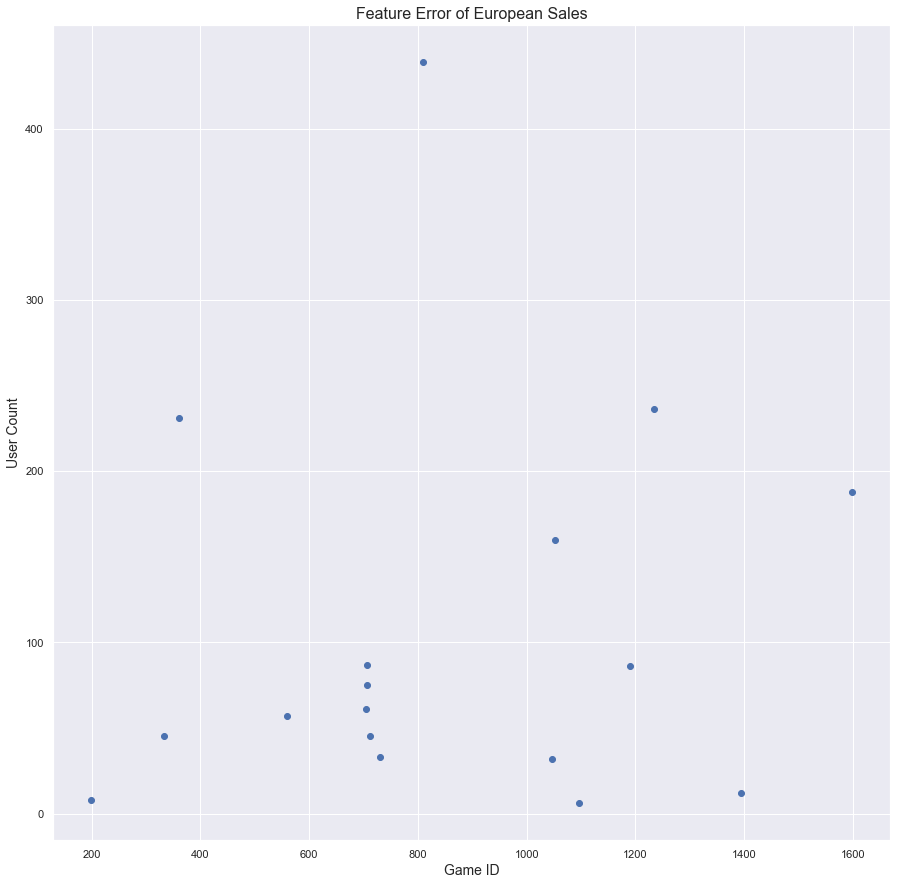

In [47]:
# Plotting the important features
_ = plt.scatter(x=EU_dif.index, y=EU_dif['User_Count'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('User Count', fontsize=14)
_ = plt.title('Feature Error of European Sales', fontsize=16)

** As seen previously, User_Count really impacts the model's prediction especially for European sales where many had counts lower than 100 for the biggest differences between test and prediction. Also, only one game was a PC game as well as another that had the word "fifa" in a review.**

** Now to use same model when European Sales is equal to or higher than the median.**

In [48]:
# Setting up European Sales higher than or equal to the Median
EU_median = df['EU_Sales'].median()
EU_median = df[df['EU_Sales'] >= EU_median]

# Setting X and y for European Sales
EU_MED_X = EU_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
EU_MED_y = EU_median['EU_Sales']

# Splitting the data into Train and Test
EU_MED_X_train, EU_MED_X_test, EU_MED_y_train, EU_MED_y_test = train_test_split(EU_MED_X, EU_MED_y, test_size=0.2, random_state=42)

In [49]:
# Using a Random Forest Regressor
EU_MED_PG = {'n_estimators': [10, 100]}

EU_MED_RF = RandomForestRegressor(min_samples_leaf=3, max_leaf_nodes=1000, random_state=42)

# Using GridSearchCV to help avoid overfitting
EU_MED_CV = GridSearchCV(EU_MED_RF, EU_MED_PG, cv=5)

EU_MED_CV.fit(EU_MED_X_train, EU_MED_y_train)

EU_MED_y_pred = EU_MED_CV.predict(EU_MED_X_test)

EU_MED_R2 = EU_MED_CV.score(EU_MED_X_test, EU_MED_y_test)
EU_MED_RMSE = np.sqrt(mean_squared_error(EU_MED_y_test, EU_MED_y_pred))

print('R^2: ' + str(EU_MED_R2))
print('Root Mean Squared Error: ' + str(EU_MED_RMSE))

R^2: 0.325143674224
Root Mean Squared Error: 0.851908328011


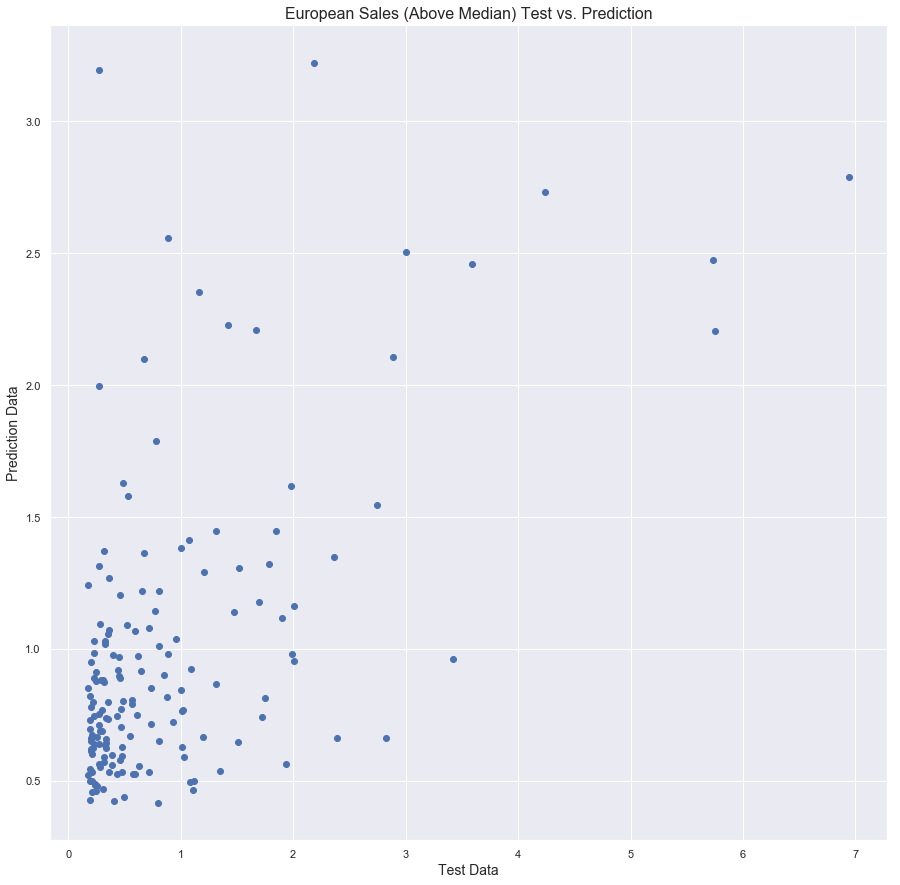

In [50]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(EU_MED_y_test, EU_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('European Sales (Above Median) Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.33 and a Root Mean Squared Error around 0.85. When comparing the test and prediction data in a plot, there is a bit of a slope. This model is  weaker than European sales overall with R^2 being lower despite a lower RMSE. But unlike previous models split by the median, this one did better with the extra parameters possibly because of the size of this subset.**

In [51]:
# Looking at most important features
EU_MED_Features = pd.Series(EU_MED_CV.best_estimator_.feature_importances_, index=EU_MED_X.columns).sort_values(ascending=False)
EU_MED_Features

kart                                              0.102967
Critic_Score                                      0.065727
mario                                             0.048421
User_Count                                        0.041106
fifa                                              0.026041
mw                                                0.021097
hasnt                                             0.020022
fanboy                                            0.019175
gta                                               0.014862
theft                                             0.013771
Developer_Rockstar North                          0.013575
fight                                             0.013045
v                                                 0.011482
call                                              0.011113
modern                                            0.010678
super                                             0.010517
brought                                           0.0088

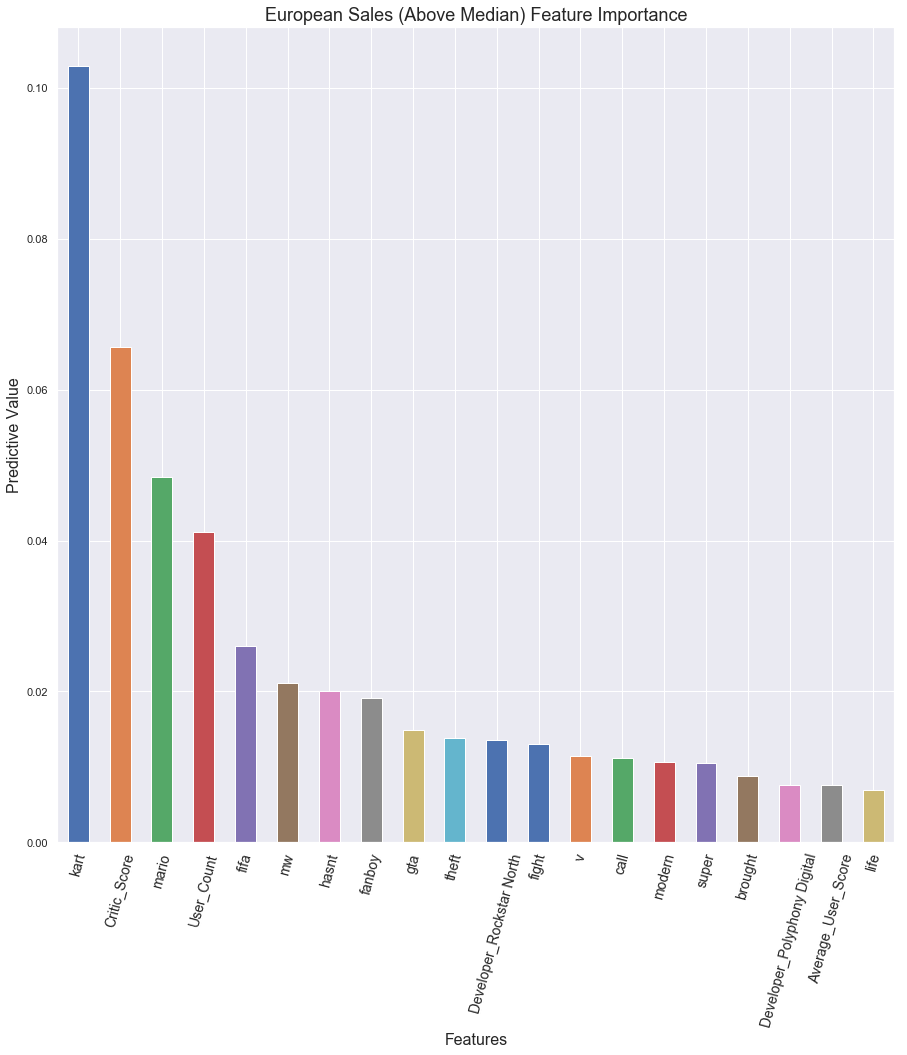

In [52]:
# Plotting Feature Importance
_ = EU_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('European Sales (Above Median) Feature Importance', fontsize=18)

** The most critical features for this model include Critic_Score and User_Count as well as the words "kart," "mario" and "fifa." The least important features tend to be different Publishers instead of Developers. One interesting difference is how "fifa" dropped a little bit in importance while "kart" improved, signifying the popularity of Racing and "Mario Kart" games.**

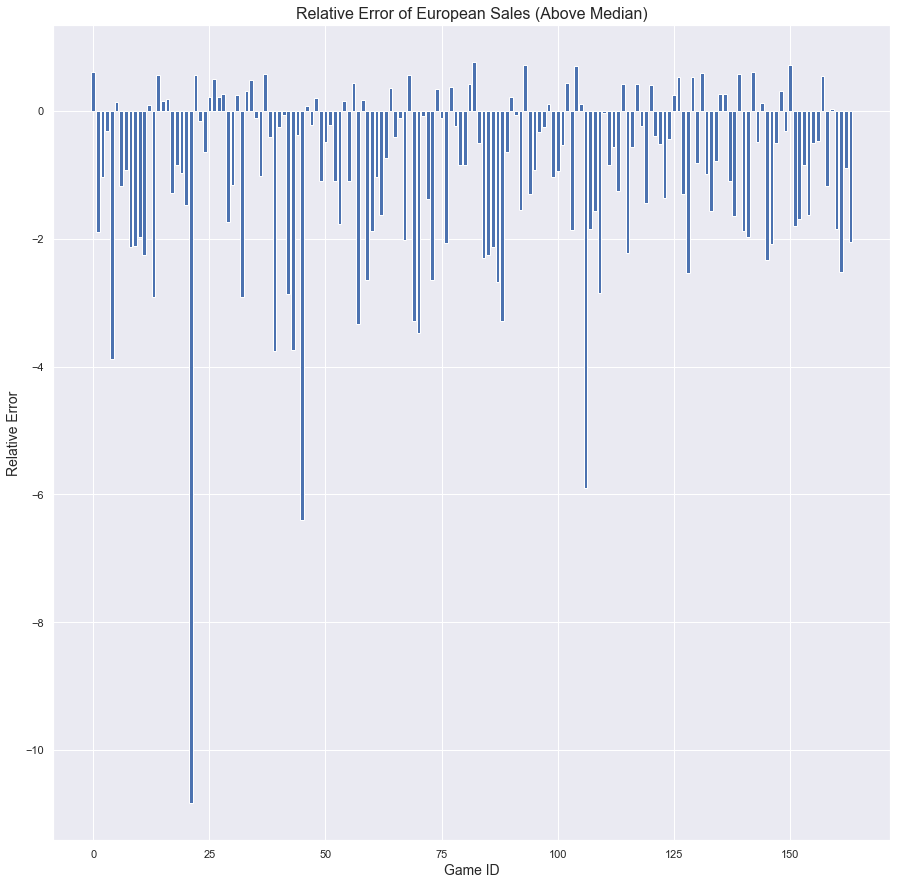

In [53]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(EU_MED_y_test)), (EU_MED_y_test - EU_MED_y_pred)/EU_MED_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of European Sales (Above Median)', fontsize=16)

In [54]:
# Game with the highest difference
EU_MED_dif = EU_MED_y_test[(EU_MED_y_test - EU_MED_y_pred)/EU_MED_y_test < -10]
EU_MED_dif = df.loc[list(EU_MED_dif.index.values), :]
EU_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
107,Blur,X360,0.066246,0.009563,0.0,0.0,0.0,0.0,0.0,0.017966,...,0,0,0,0,0,0,0,1,0,0


In [55]:
# Looking at the most important features for that game
EU_MED_dif[['Name', 'kart', 'Critic_Score', 'mario', 'User_Count', 'fifa']]

,Name,kart,Critic_Score,mario,User_Count,fifa
107,Blur,0.216718,82.0,0.170187,169.0,0.0


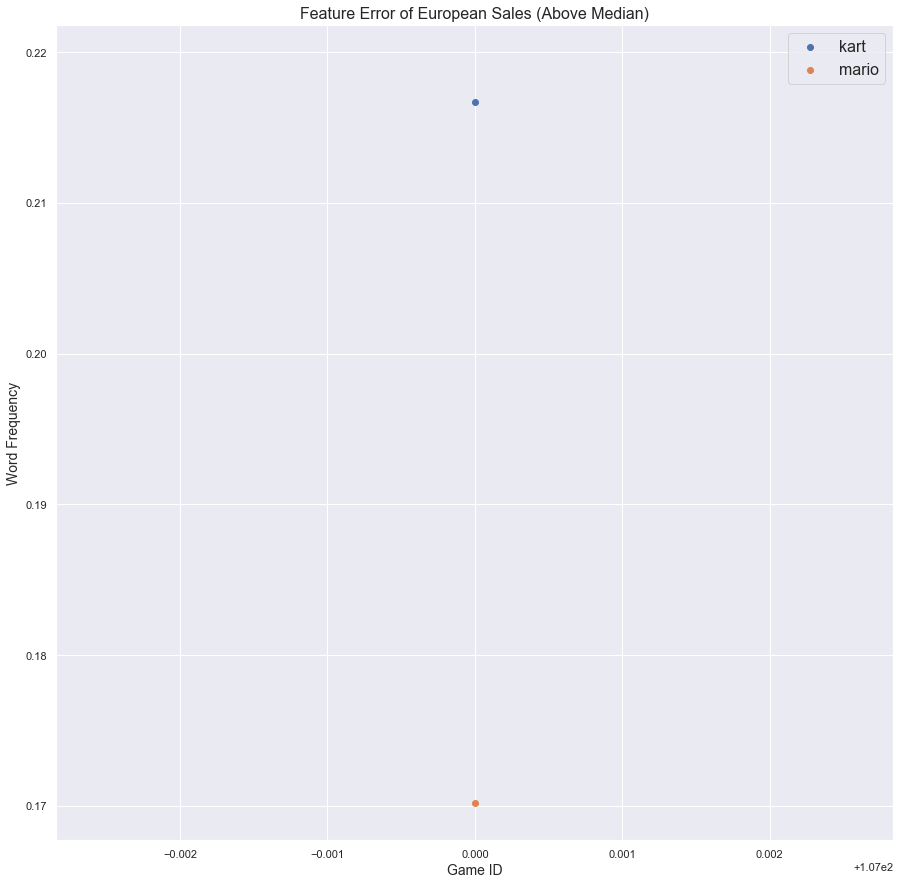

In [56]:
# Plotting the important features
_ = plt.scatter(x=EU_MED_dif.index, y=EU_MED_dif['kart'])
_ = plt.scatter(x=EU_MED_dif.index, y=EU_MED_dif['mario'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Word Frequency', fontsize=14)
_ = plt.legend(loc='upper right', fontsize=16)
_ = plt.title('Feature Error of European Sales (Above Median)', fontsize=16)

** Unlike the previous models, this one has a single game for the most extreme difference between test and prediction, and while User_Count is over 100, the biggest impact might be the words "mario" and "kart." Although their values are below zero, they start in the tenth position behind the decimal, which may explain how important those words are in their reviews.**

** Now to use the same model on Japanese Sales.**

In [57]:
# Setting X and y for Japanese Sales
JP_X = df.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
JP_y = df['JP_Sales']

# Splitting the data into Train and Test
JP_X_train, JP_X_test, JP_y_train, JP_y_test = train_test_split(JP_X, JP_y, test_size=0.2, random_state=42)

In [58]:
# Using a Random Forest Regressor
JP_PG = {'n_estimators': [10, 100]}

JP_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
JP_CV = GridSearchCV(JP_RF, JP_PG, cv=5)

JP_CV.fit(JP_X_train, JP_y_train)

JP_y_pred = JP_CV.predict(JP_X_test)

JP_R2 = JP_CV.score(JP_X_test, JP_y_test)
JP_RMSE = np.sqrt(mean_squared_error(JP_y_test, JP_y_pred))

print('R^2: ' + str(JP_R2))
print('Root Mean Squared Error: ' + str(JP_RMSE))

R^2: 0.373246360153
Root Mean Squared Error: 0.456585872881


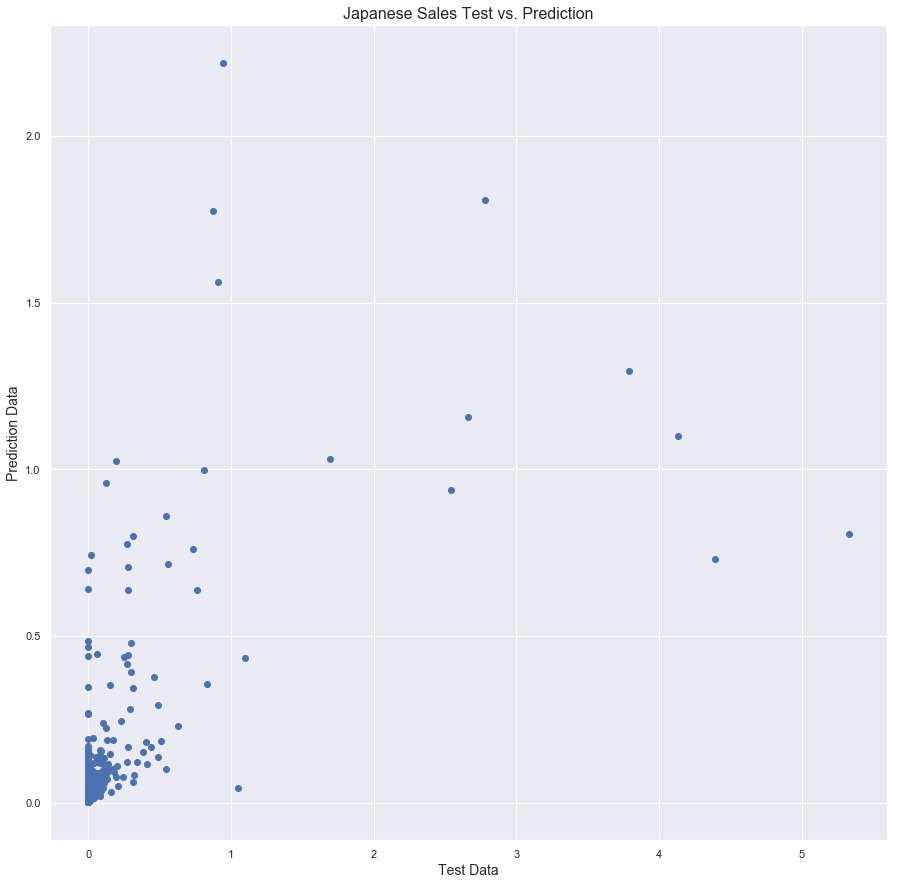

In [59]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(JP_y_test, JP_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Japanese Sales Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.37 and a Root Mean Squared Error around 0.46. When comparing the test and prediction data in a plot, there is a minimal slope further showing the weakness of the model. While the slope is similar to the previous models, R^2 and the RMSE are lower. Also, this model did better without the extra parameters possibly because of the size of this subset.**

In [60]:
# Looking at most important features
JP_Features = pd.Series(JP_CV.best_estimator_.feature_importances_, index=JP_X.columns).sort_values(ascending=False)
JP_Features

super                                                       0.080670
Publisher_Nintendo                                          0.072419
Developer_SquareSoft                                        0.066180
ff                                                          0.065171
dragon                                                      0.044075
mario                                                       0.043233
quest                                                       0.038503
monster                                                     0.028773
armor                                                       0.021342
evil                                                        0.017546
Developer_Polyphony Digital                                 0.015960
Developer_Nintendo                                          0.014735
hunt                                                        0.013589
freedom                                                     0.010778
final                             

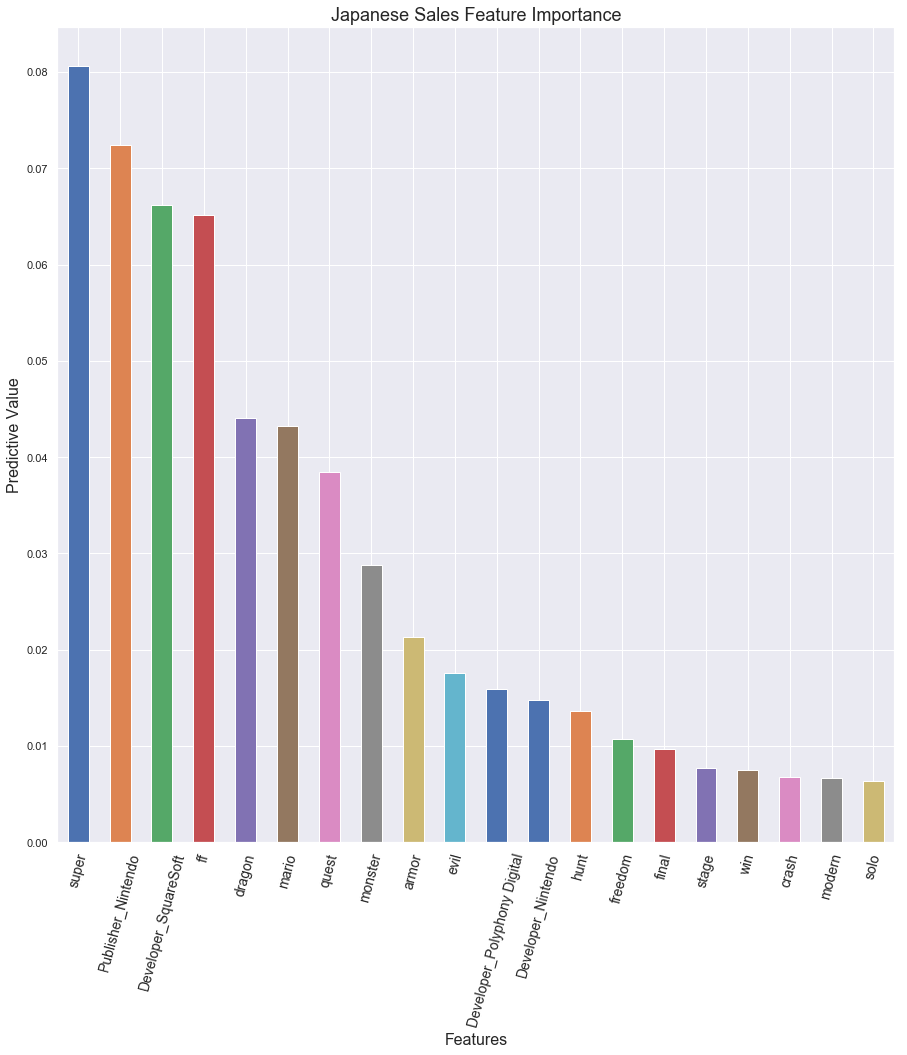

In [61]:
# Plotting Feature Importance
_ = JP_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('Japanese Sales Feature Importance', fontsize=18)

** The most critical features for this model actually include Publishers as well as Developers like Nintendo and SquareSoft plus the words "super," "ff" (likely standing for "Final Fantasy") and "dragon." The least important features tend to be different Publishers. This is the first model to really emphasize the importance of the people who make the games, which is understandable because of how popular "Mario" games and RPGs are in Japan.**

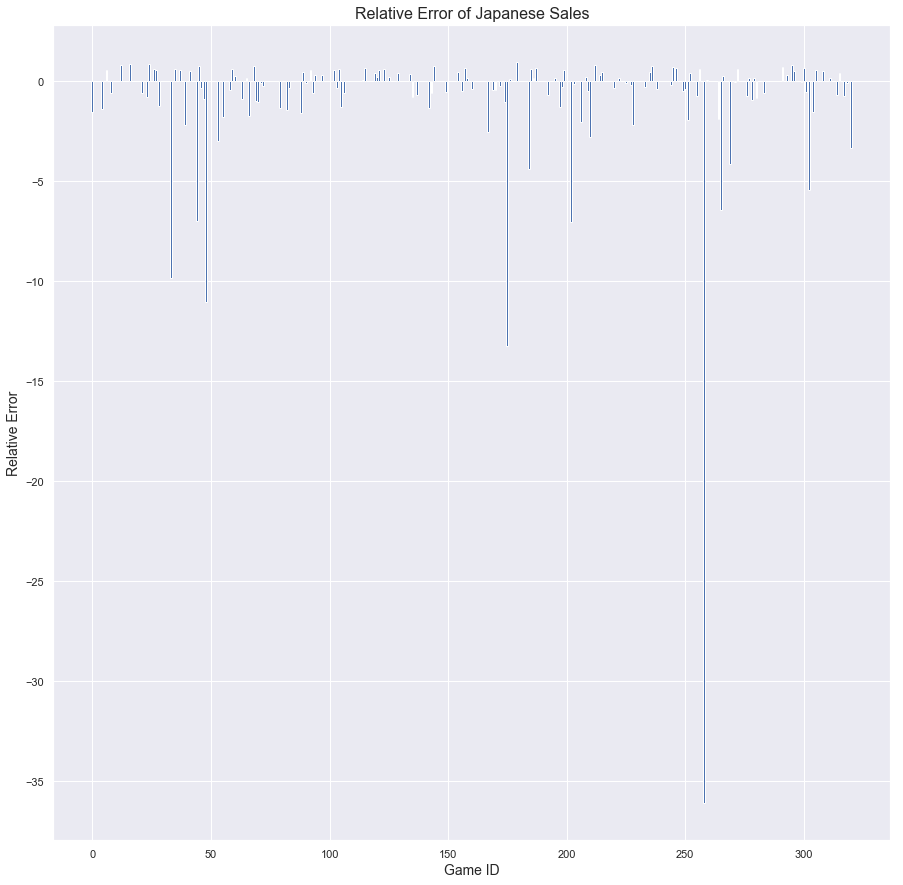

In [62]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(JP_y_test)), (JP_y_test - JP_y_pred)/JP_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of Japanese Sales', fontsize=16)

In [63]:
# Games with the highest difference
JP_dif = JP_y_test[(JP_y_test - JP_y_pred)/JP_y_test < -35]
JP_dif = df.loc[list(JP_dif.index.values), :]
JP_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.000000,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
168,Call of Duty: World at War,X360,0.072884,0.000417,0.0,0.000000,0.001384,0.000000,0.002036,0.009523,...,0,0,0,0,0,0,0,0,1,0
135,Burnout 2: Point of Impact,XB,0.030425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1492,Top Spin 4,X360,0.078697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004659,...,0,0,0,0,0,0,1,0,0,0
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.000000,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
300,Diablo III,PC,0.070642,0.008427,0.0,0.000016,0.005490,0.001018,0.014894,0.005756,...,0,0,0,0,0,0,0,0,1,0
518,Gears of War 4,XOne,0.081923,0.006201,0.0,0.000000,0.002201,0.002263,0.003822,0.011083,...,0,0,0,0,0,0,0,0,1,0
361,Enemy Territory: Quake Wars,PC,0.068780,0.000000,0.0,0.000000,0.000000,0.009416,0.000000,0.024777,...,0,0,0,0,0,0,0,0,0,1
1573,Worldwide Soccer Manager 2008,PC,0.054256,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
914,NBA Street Vol. 2,XB,0.065440,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.007317,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# Looking at the most important features for these games
JP_dif[['Name', 'super', 'Publisher_Nintendo', 'Developer_SquareSoft', 'ff', 'dragon']]

,Name,super,Publisher_Nintendo,Developer_SquareSoft,ff,dragon
1140,Rise of the Tomb Raider,0.008744,0,0,0.000000,0.001180
168,Call of Duty: World at War,0.000000,0,0,0.000000,0.000000
135,Burnout 2: Point of Impact,0.000000,0,0,0.000000,0.000000
1492,Top Spin 4,0.000000,0,0,0.000000,0.000000
239,Dark Souls III,0.003179,0,0,0.000000,0.000419
300,Diablo III,0.001862,0,0,0.000040,0.000414
518,Gears of War 4,0.007948,0,0,0.000000,0.000000
361,Enemy Territory: Quake Wars,0.002717,0,0,0.000000,0.000000
1573,Worldwide Soccer Manager 2008,0.000000,0,0,0.000000,0.000000
914,NBA Street Vol. 2,0.000000,0,0,0.000000,0.000000


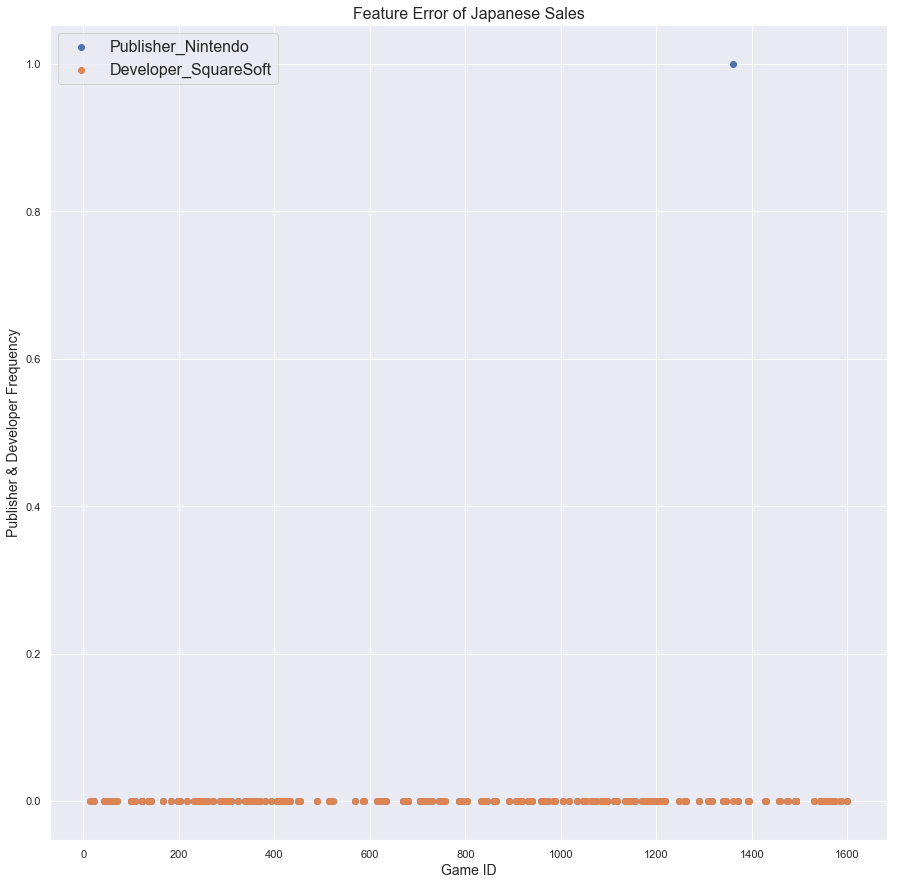

In [65]:
# Plotting the important features
_ = plt.scatter(x=JP_dif.index, y=JP_dif['Publisher_Nintendo'])
_ = plt.scatter(x=JP_dif.index, y=JP_dif['Developer_SquareSoft'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Publisher & Developer Frequency', fontsize=14)
_ = plt.legend(loc='upper left', fontsize=16)
_ = plt.title('Feature Error of Japanese Sales', fontsize=16)

** For this model, the games with the highest difference between test and prediction are not affiliated with Nintendo and SquareSoft. In fact, only one published by Nintendo was in this group with none developed by SquareSoft. This further emphasizes the popularity of these two companies in the area.** 

** Now to use same model when Japanese Sales is equal to or higher than the median.**

In [66]:
# Setting up Japanese Sales higher than or equal to the Median
JP_median = df['JP_Sales'].median()
JP_median = df[df['JP_Sales'] >= JP_median]

# Setting X and y for Japanese Sales
JP_MED_X = JP_median.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index'], axis=1)
JP_MED_y = JP_median['JP_Sales']

# Splitting the data into Train and Test
JP_MED_X_train, JP_MED_X_test, JP_MED_y_train, JP_MED_y_test = train_test_split(JP_MED_X, JP_MED_y, test_size=0.2, random_state=42)

In [67]:
# Using a Random Forest Regressor
JP_MED_PG = {'n_estimators': [10, 100]}

JP_MED_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
JP_MED_CV = GridSearchCV(JP_MED_RF, JP_MED_PG, cv=5)

JP_MED_CV.fit(JP_MED_X_train, JP_MED_y_train)

JP_MED_y_pred = JP_MED_CV.predict(JP_MED_X_test)

JP_MED_R2 = JP_MED_CV.score(JP_MED_X_test, JP_MED_y_test)
JP_MED_RMSE = np.sqrt(mean_squared_error(JP_MED_y_test, JP_MED_y_pred))

print('R^2: ' + str(JP_MED_R2))
print('Root Mean Squared Error: ' + str(JP_MED_RMSE))

R^2: 0.373246360153
Root Mean Squared Error: 0.456585872881


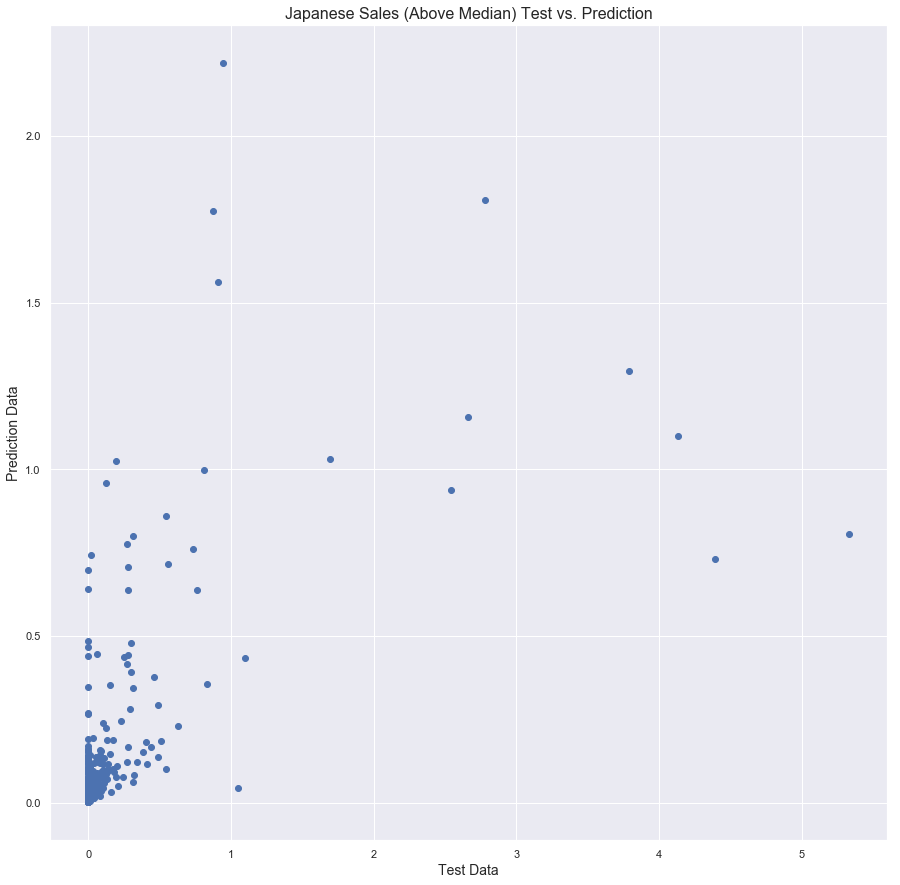

In [68]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(JP_MED_y_test, JP_MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('Japanese Sales (Above Median) Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.37 and a Root Mean Squared Error around 0.46. When comparing the test and prediction data in a plot, there is a minimal slope further showing the weakness of the model. If that sounds familiar, it is because that is the exact same as overall Japanese sales (including neither using extra parameters). Although there could be a mistake, this may be due to the fact that the amount of Japanese sales are lower meaning the median may be close to, if not exactly, zero, which makes the results practically the same.**

In [69]:
# Looking at most important features
JP_MED_Features = pd.Series(JP_MED_CV.best_estimator_.feature_importances_, index=JP_MED_X.columns).sort_values(ascending=False)
JP_MED_Features

super                                                       0.080670
Publisher_Nintendo                                          0.072419
Developer_SquareSoft                                        0.066180
ff                                                          0.065171
dragon                                                      0.044075
mario                                                       0.043233
quest                                                       0.038503
monster                                                     0.028773
armor                                                       0.021342
evil                                                        0.017546
Developer_Polyphony Digital                                 0.015960
Developer_Nintendo                                          0.014735
hunt                                                        0.013589
freedom                                                     0.010778
final                             

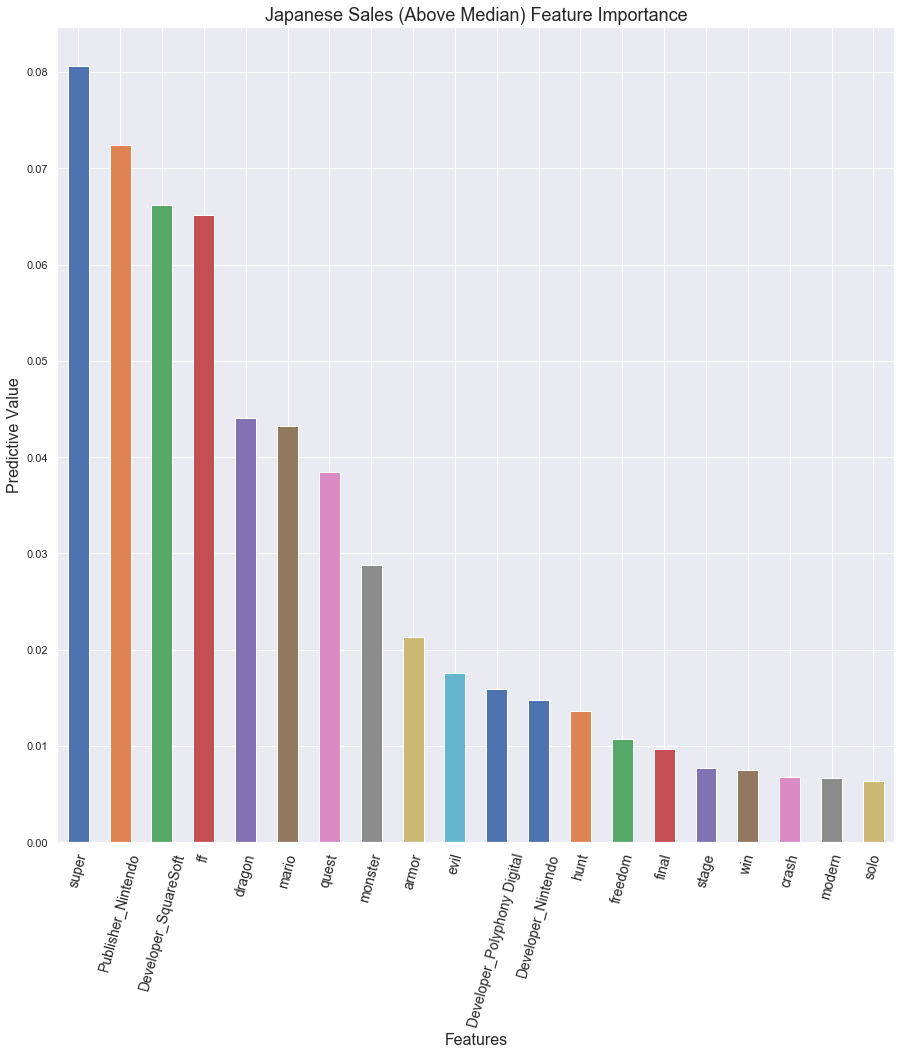

In [70]:
# Plotting Feature Importance
_ = JP_MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('Japanese Sales (Above Median) Feature Importance', fontsize=18)

** The most and least important features for this model are the same as the previous one.**

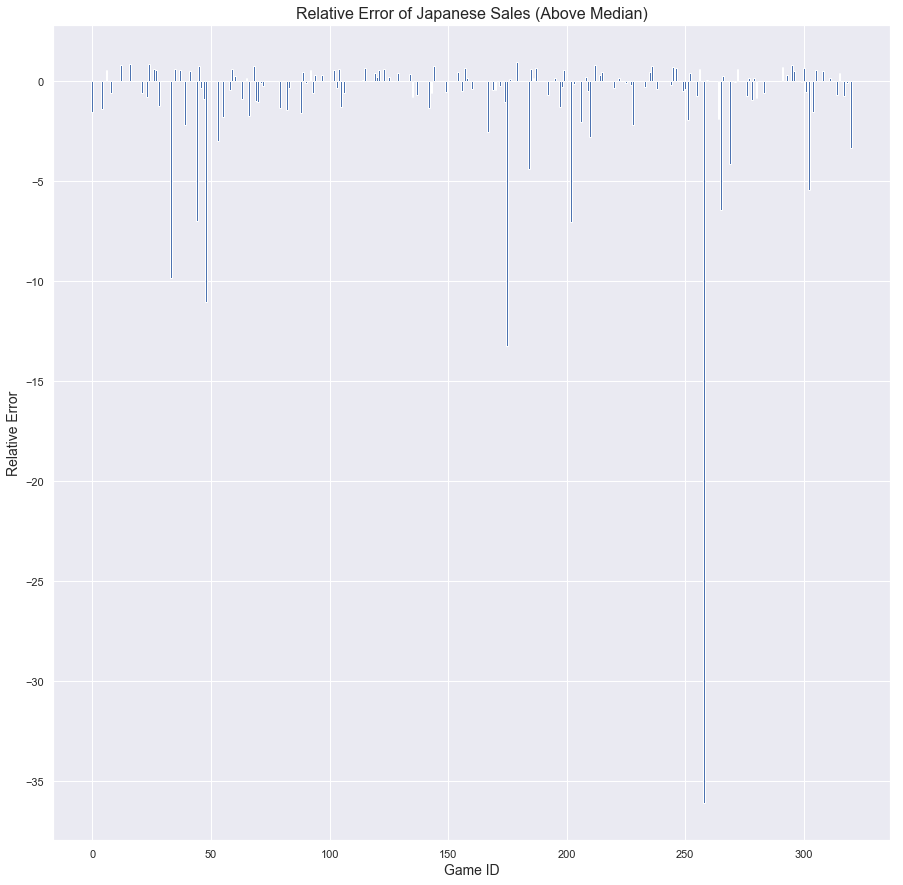

In [71]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(JP_MED_y_test)), (JP_MED_y_test - JP_MED_y_pred)/JP_MED_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of Japanese Sales (Above Median)', fontsize=16)

In [72]:
# Games with the highest difference
JP_MED_dif = JP_MED_y_test[(JP_MED_y_test - JP_MED_y_pred)/JP_MED_y_test < -35]
JP_MED_dif = df.loc[list(JP_MED_dif.index.values), :]
JP_MED_dif

,Name,Platform,a,about,absolut,ac,account,across,act,action,...,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_iNiS,Developer_id Software,Developer_neo Software,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_T
1140,Rise of the Tomb Raider,PC,0.071693,0.004004,0.0,0.000000,0.000000,0.000965,0.000717,0.024437,...,0,0,0,0,0,0,0,0,1,0
168,Call of Duty: World at War,X360,0.072884,0.000417,0.0,0.000000,0.001384,0.000000,0.002036,0.009523,...,0,0,0,0,0,0,0,0,1,0
135,Burnout 2: Point of Impact,XB,0.030425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1492,Top Spin 4,X360,0.078697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004659,...,0,0,0,0,0,0,1,0,0,0
239,Dark Souls III,PC,0.068478,0.005560,0.0,0.000000,0.000802,0.000569,0.001401,0.003220,...,0,0,0,0,0,0,0,0,1,0
300,Diablo III,PC,0.070642,0.008427,0.0,0.000016,0.005490,0.001018,0.014894,0.005756,...,0,0,0,0,0,0,0,0,1,0
518,Gears of War 4,XOne,0.081923,0.006201,0.0,0.000000,0.002201,0.002263,0.003822,0.011083,...,0,0,0,0,0,0,0,0,1,0
361,Enemy Territory: Quake Wars,PC,0.068780,0.000000,0.0,0.000000,0.000000,0.009416,0.000000,0.024777,...,0,0,0,0,0,0,0,0,0,1
1573,Worldwide Soccer Manager 2008,PC,0.054256,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
914,NBA Street Vol. 2,XB,0.065440,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.007317,...,0,0,0,0,0,0,1,0,0,0


In [73]:
# Looking at the most important features for these games
JP_MED_dif[['Name', 'super', 'Publisher_Nintendo', 'Developer_SquareSoft', 'ff', 'dragon']]

,Name,super,Publisher_Nintendo,Developer_SquareSoft,ff,dragon
1140,Rise of the Tomb Raider,0.008744,0,0,0.000000,0.001180
168,Call of Duty: World at War,0.000000,0,0,0.000000,0.000000
135,Burnout 2: Point of Impact,0.000000,0,0,0.000000,0.000000
1492,Top Spin 4,0.000000,0,0,0.000000,0.000000
239,Dark Souls III,0.003179,0,0,0.000000,0.000419
300,Diablo III,0.001862,0,0,0.000040,0.000414
518,Gears of War 4,0.007948,0,0,0.000000,0.000000
361,Enemy Territory: Quake Wars,0.002717,0,0,0.000000,0.000000
1573,Worldwide Soccer Manager 2008,0.000000,0,0,0.000000,0.000000
914,NBA Street Vol. 2,0.000000,0,0,0.000000,0.000000


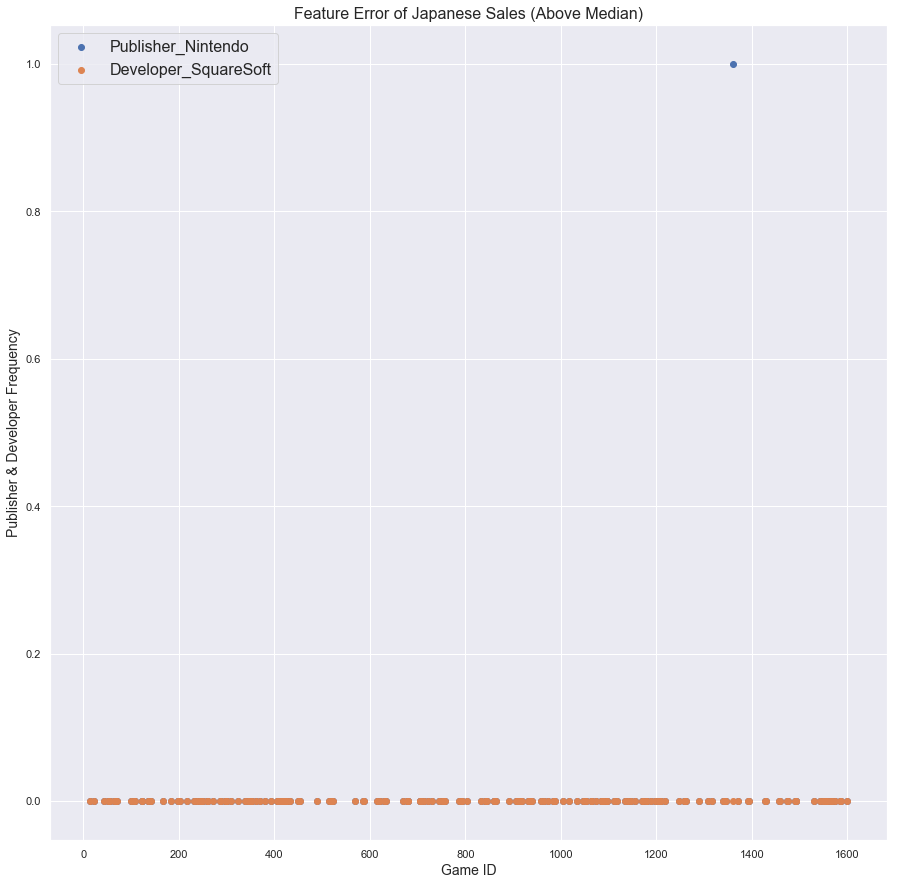

In [74]:
# Plotting the important features
_ = plt.scatter(x=JP_MED_dif.index, y=JP_MED_dif['Publisher_Nintendo'])
_ = plt.scatter(x=JP_MED_dif.index, y=JP_MED_dif['Developer_SquareSoft'])
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Publisher & Developer Frequency', fontsize=14)
_ = plt.legend(loc='upper left', fontsize=16)
_ = plt.title('Feature Error of Japanese Sales (Above Median)', fontsize=16)

** Because the results have been the same as the previous model, the biggest difference between test and prediction including the extremes are the same.**

** Now to further test the model, I will try it out on new data.**

In [75]:
# Uploading Dataset and inspecting its contents
df_2 = pd.DataFrame()
df_2 = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/Video Game Capstone Project/Data Wrangling/vg_2_df.csv', delimiter='\t', index_col=0)
df_2 = df_2.reset_index()
df_2.head()

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1


In [76]:
# Setting X and y for Data
X = df_2.drop(['Console', 'Title', 'US Sales (millions)', 'YearReleased', 'YearReleasedSq', 'Publisher', 'Genre'], axis=1)
y = df_2['US Sales (millions)']

# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Using a Random Forest Regressor
PG = {'n_estimators': [10, 100]}

RF = RandomForestRegressor(min_samples_leaf=3, max_leaf_nodes=1000, random_state=42)

# Using GridSearchCV to help avoid overfitting
CV = GridSearchCV(RF, PG, cv=5)

CV.fit(X_train, y_train)

y_pred = CV.predict(X_test)

R2 = CV.score(X_test, y_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('R^2: ' + str(R2))
print('Root Mean Squared Error: ' + str(RMSE))

R^2: 0.86286214218
Root Mean Squared Error: 0.410478728864


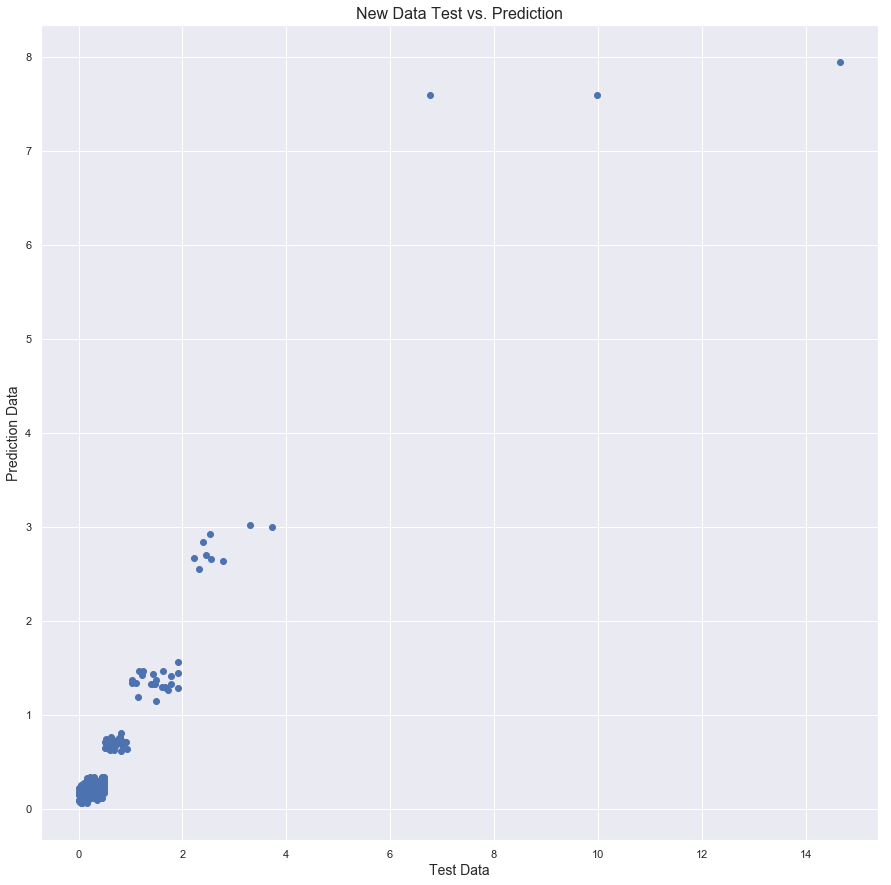

In [78]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('New Data Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.86 and a Root Mean Squared Error around 0.41. When comparing the test and prediction data in a plot, there is a very steep slope. Unlike the previous dataset, the model is very strong with this data. It has a very high R^2 along with a low RMSE. And much like the previous models on overall sales, this one did better with the extra parameters.**

In [79]:
# Looking at most important features
Features = pd.Series(CV.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
Features

Block4                        0.545533
Block2                        0.191637
Block1                        0.133290
Block0.5                      0.045726
Wii                           0.018945
Action                        0.011345
Arcade                        0.008532
Review Score                  0.007299
ReviewSq                      0.005950
2009                          0.002655
LifecycleSq                   0.002509
Lifecycle                     0.002282
lnUsedPrice                   0.001960
MaxPlayers                    0.001906
SideScrolling                 0.001892
Sports                        0.001834
Usedprice                     0.001714
RatingE                       0.001652
X360                          0.000933
Multiplatform                 0.000840
Online                        0.000792
RatingM                       0.000791
ThirdPerson                   0.000672
Handheld                      0.000646
Shooter                       0.000601
2007                     

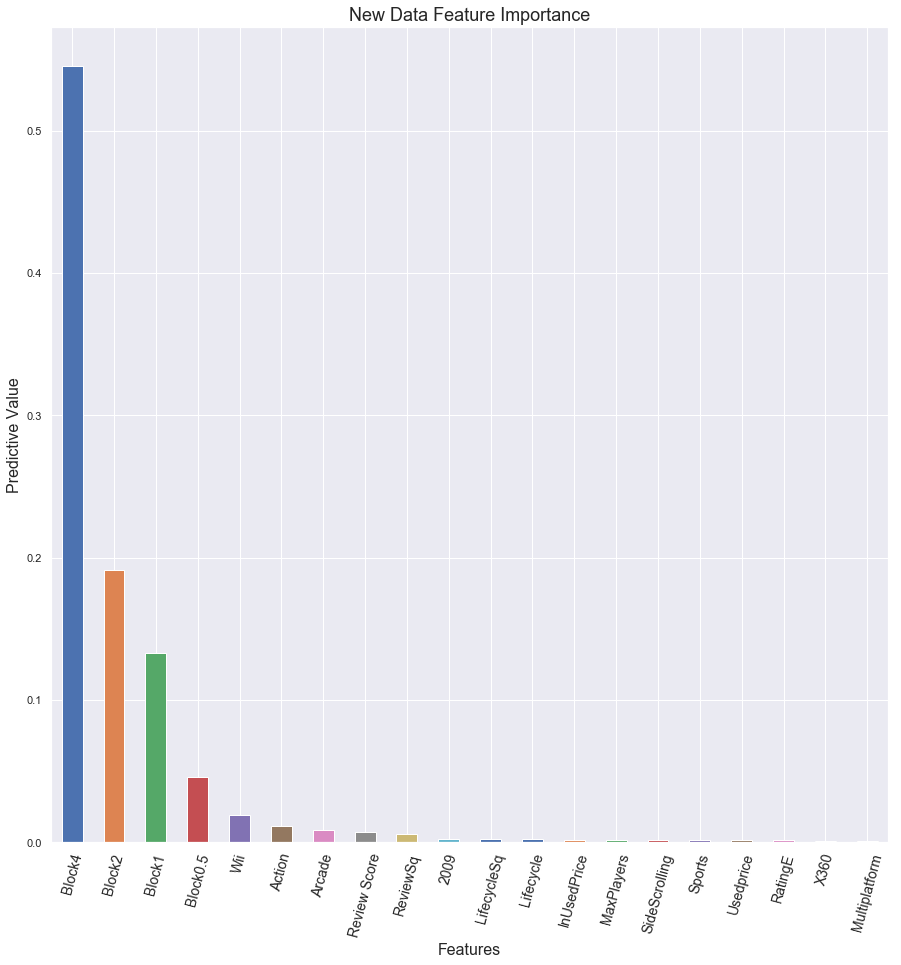

In [80]:
# Plotting Feature Importance
_ = Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('New Data Feature Importance', fontsize=18)

** The most critical features for this model actually are when the games are released during the year especially the 4th Block, which is around the holidays. The least important features tend to be some of the more obscure genres. This model really emphasizes the importance of release dates for video games.**

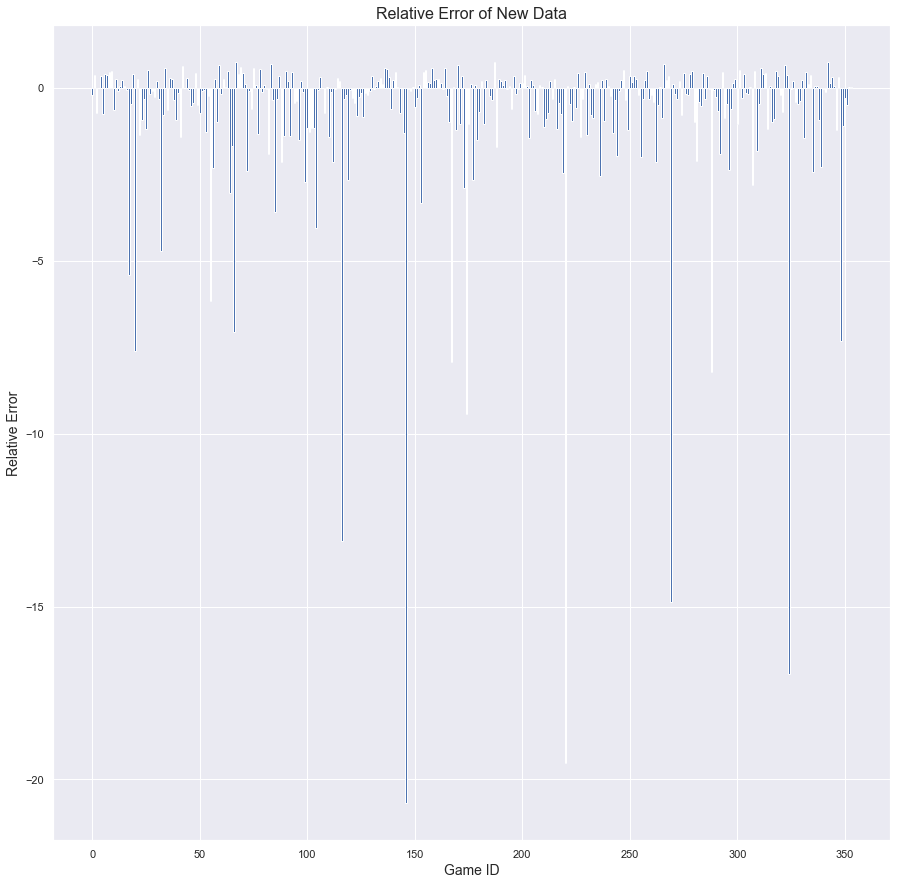

In [81]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(y_test)), (y_test - y_pred)/y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of New Data', fontsize=16)

In [82]:
# Games with the highest difference
df_2_dif = y_test[(y_test - y_pred)/y_test < -10]
df_2_dif = df_2.loc[list(df_2_dif.index.values), :]
df_2_dif

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
921,Nintendo DS,Nervous Brickdown,0.01,0,0,0,0,2007,0,0,...,0,0,0,0,0,0,0,0,0,0
915,X360,Virtua Tennis 3,0.01,0,0,0,0,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
462,Nintendo DS,Custom Robo Arena,0.01,0,0,0,0,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
916,Nintendo DS,Balls of Fury,0.01,0,0,0,0,2007,0,0,...,0,0,0,0,1,0,0,0,0,0
170,Nintendo DS,Electroplankton,0.01,0,0,0,0,2005,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Looking at the most important features for these games
df_2_dif[['Title', 'Block4', 'Block2', 'Block1', 'Block0.5', 'Wii']]

,Title,Block4,Block2,Block1,Block0.5,Wii
921,Nervous Brickdown,0,0,0,0,0
915,Virtua Tennis 3,0,0,0,0,0
462,Custom Robo Arena,0,0,0,0,0
916,Balls of Fury,0,0,0,0,0
170,Electroplankton,0,0,0,0,0


** For this model, the games with the highest difference between test and prediction do not come out during the major blocks of the year nor are available on the Nintendo Wii. Since the data seems to be missing a column labeled "Block3," it is likely these games came out then, which may be the worst time to sell video games.** 

** Now to use same model on the new data when U.S. Sales is equal to or higher than the median.**

In [84]:
# Setting up US Sales higher than or equal to the Median
df_2_median = df_2['US Sales (millions)'].median()
df_2_median = df_2[df_2['US Sales (millions)'] >= df_2_median]

# Setting X and y for Data
MED_X = df_2_median.drop(['Console', 'Title', 'US Sales (millions)', 'YearReleased', 'YearReleasedSq', 'Publisher', 'Genre'], axis=1)
MED_y = df_2_median['US Sales (millions)']

# Splitting the data into Train and Test
MED_X_train, MED_X_test, MED_y_train, MED_y_test = train_test_split(MED_X, MED_y, test_size=0.2, random_state=42)

In [85]:
# Using a Random Forest Regressor
MED_PG = {'n_estimators': [10, 100]}

MED_RF = RandomForestRegressor(random_state=42)

# Using GridSearchCV to help avoid overfitting
MED_CV = GridSearchCV(MED_RF, MED_PG, cv=5)

MED_CV.fit(MED_X_train, MED_y_train)

MED_y_pred = MED_CV.predict(MED_X_test)

MED_R2 = MED_CV.score(MED_X_test, MED_y_test)
MED_RMSE = np.sqrt(mean_squared_error(MED_y_test, MED_y_pred))

print('R^2: ' + str(MED_R2))
print('Root Mean Squared Error: ' + str(MED_RMSE))

R^2: 0.92132072374
Root Mean Squared Error: 0.42319877516


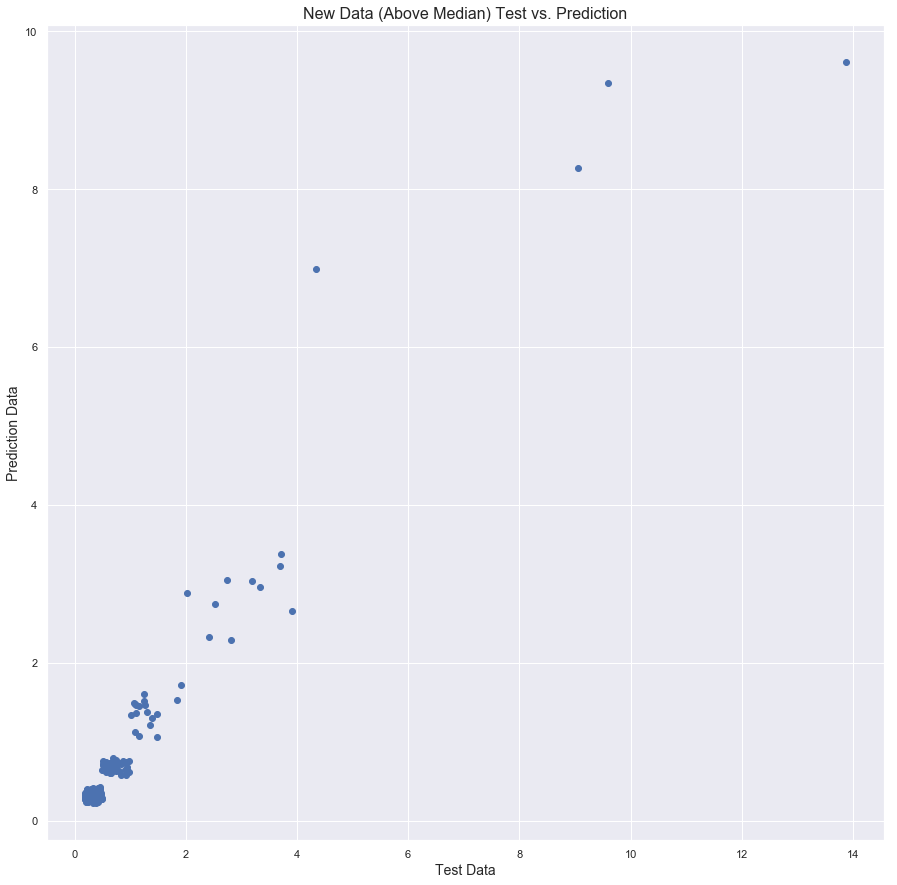

In [86]:
# Plotting comparison between Test and Prediction data
_ = plt.scatter(MED_y_test, MED_y_pred)
_ = plt.xlabel('Test Data', fontsize=14)
_ = plt.ylabel('Prediction Data', fontsize=14)
_ = plt.title('New Data (Above Median) Test vs. Prediction', fontsize=16)

** With the Random Forest model, we get an R^2 around 0.92 and a Root Mean Squared Error around 0.42. When comparing the test and prediction data in a plot, there is a very steep slope. With R^2 being higher than the model for overall U.S. Sales, the median could be very low so there are a lot more sales above it. And while the RMSE is higher, it is by a minimal amount. Much like Global Sales from the earlier dataset, this is one of the few times that the model did better after filtering by the median plus, it did not need any extra parameters.**

In [87]:
# Looking at most important features
MED_Features = pd.Series(MED_CV.best_estimator_.feature_importances_, index=MED_X.columns).sort_values(ascending=False)
MED_Features

Block4                        0.680279
Block1                        0.151334
Block2                        0.038238
Action                        0.017427
Block0.5                      0.012011
RatingE                       0.009257
Review Score                  0.009078
Arcade                        0.007857
Sports                        0.005854
ReviewSq                      0.005713
2005                          0.005552
Lifecycle                     0.005491
lnUsedPrice                   0.005301
SideScrolling                 0.005191
Wii                           0.004491
Platform                      0.004385
Usedprice                     0.004282
Puzzle                        0.003737
Nintendo                      0.002149
MaxPlayers                    0.001827
LifecycleSq                   0.001809
2006                          0.001695
ThirdPerson                   0.001560
X360                          0.001368
Multiplatform                 0.001256
SciFi                    

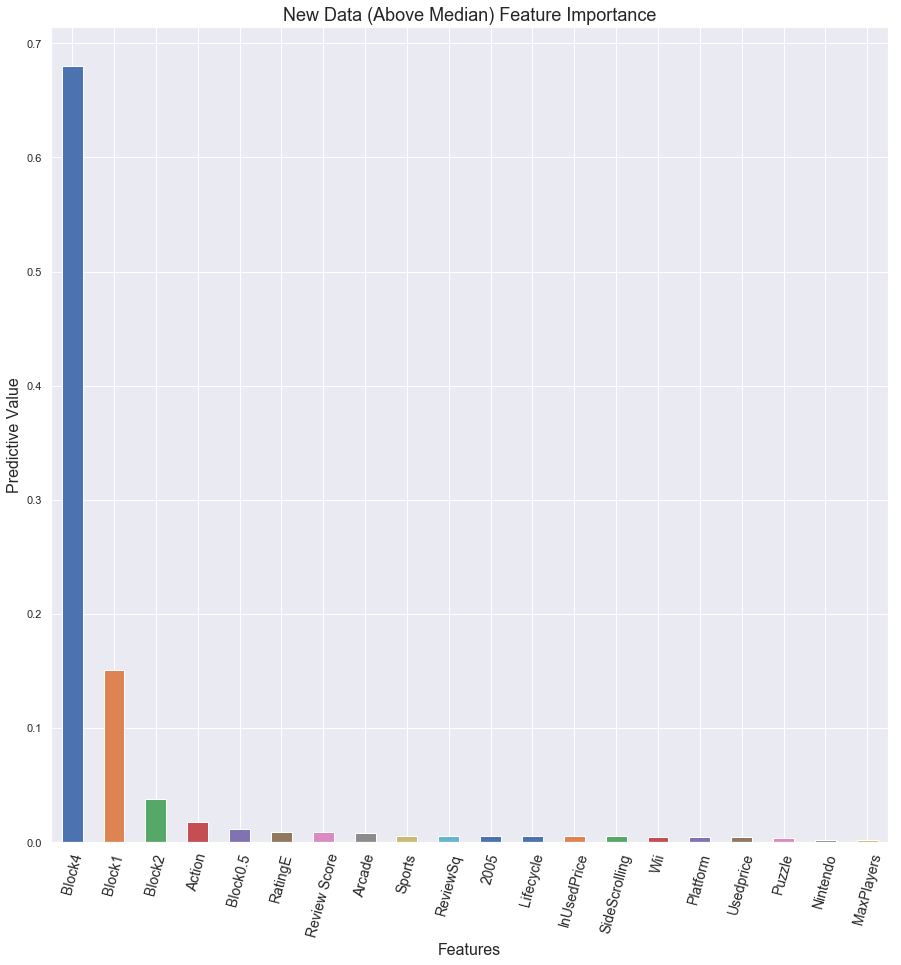

In [88]:
# Plotting Feature Importance
_ = MED_Features[:20].plot(kind='bar')
_ = plt.xticks(rotation=75, fontsize=14)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel('Predictive Value', fontsize=16)
_ = plt.title('New Data (Above Median) Feature Importance', fontsize=18)

** The most critical features for this model are still when the games are released during the year especially the 4th Block, which has an impact much higher than any other feature. However, Action games are more important than games that came out in Block 0.5 and Wii games are also lower than before. Plus, Block 1 became more important than Block 2. It is possible that many of the games below the median came out in Blocks 2 and 0.5 as well as were on the Wii.**

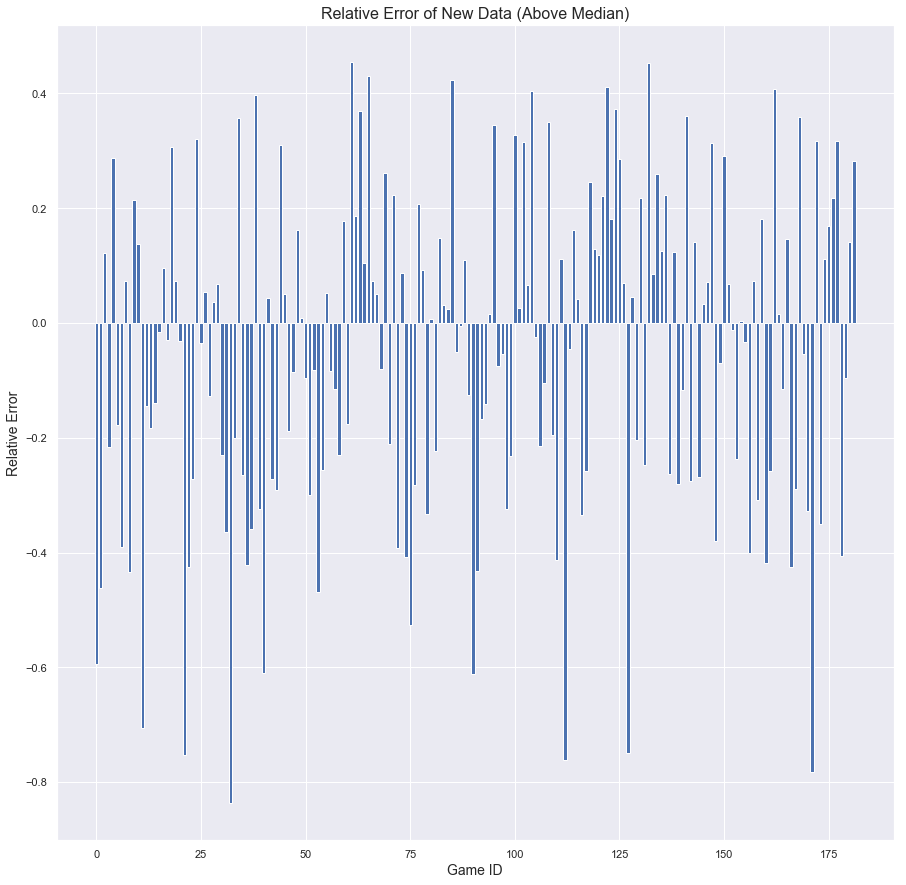

In [89]:
# Shows Relative Error between test and prediction
_ = plt.bar(np.arange(len(MED_y_test)), (MED_y_test - MED_y_pred)/MED_y_test)
_ = plt.xlabel('Game ID', fontsize=14)
_ = plt.ylabel('Relative Error', fontsize=14)
_ = plt.title('Relative Error of New Data (Above Median)', fontsize=16)

In [90]:
# Games with the highest difference
df_2_MED_dif = MED_y_test[(MED_y_test - MED_y_pred)/MED_y_test < -0.6]
df_2_MED_dif = df_2.loc[list(df_2_MED_dif.index.values), :]
df_2_MED_dif

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
1733,PlayStation 3,Sonic & SEGA All-Stars Racing,0.19,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
294,Sony PSP,The Sims 2: Pets,0.21,0,0,0,0,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
299,Nintendo Wii,Rampage: Total Destruction,0.19,0,0,0,0,2006,0,0,...,0,0,0,0,0,0,0,1,0,1
296,X360,Disney/Pixar Cars,0.20,0,0,0,0,2006,0,0,...,0,0,0,0,1,0,0,0,0,1
471,Nintendo DS,Mario Party DS,4.34,1,1,1,1,2007,0,0,...,0,0,0,0,0,1,0,0,0,1
291,X360,The Outfit,0.23,0,0,0,0,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
90,X360,NBA 2K6,0.22,0,0,0,0,2005,0,1,...,0,0,0,0,0,0,0,0,0,0
1146,Nintendo Wii,MX vs. ATV Untamed,0.22,0,0,0,0,2008,0,0,...,0,0,0,0,1,0,0,0,1,1


In [91]:
# Looking at the most important features for these games
df_2_MED_dif[['Title', 'Block4', 'Block1', 'Block2', 'Action', 'Block0.5']]

,Title,Block4,Block1,Block2,Action,Block0.5
1733,Sonic & SEGA All-Stars Racing,0,0,0,0,0
294,The Sims 2: Pets,0,0,0,0,0
299,Rampage: Total Destruction,0,0,0,1,0
296,Disney/Pixar Cars,0,0,0,1,0
471,Mario Party DS,1,1,1,1,1
291,The Outfit,0,0,0,1,0
90,NBA 2K6,0,0,0,0,0
1146,MX vs. ATV Untamed,0,0,0,0,0


** Except for "Mario Party DS," the games with the highest difference between test and prediction did not come out during the major release blocks of the year. While some were Action games, the times that games are released still have the biggest impact on this model's prediction.**